In [1]:
#importing important libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
ifr=pd.read_csv('auto_insurance_fraud.csv',na_values='?')
ifr.head(27)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       17-10-2014           OH   
1                  228   42         342868       27-06-2006           IN   
2                  134   29         687698       06-09-2000           OH   
3                  256   41         227811       25-05-1990           IL   
4                  228   44         367455       06-06-2014           IL   
5                  256   39         104594       12-10-2006           OH   
6                  137   34         413978       04-06-2000           IN   
7                  165   37         429027       03-02-1990           IL   
8                   27   33         485665       05-02-1997           IL   
9                  212   42         636550       25-07-2011           IL   
10                 235   42         543610       26-05-2002           OH   
11                 447   61         214618       29-05-1999           OH   
12                  60   23         842643       20-11-1997           OH   
13                 121   34         626808       26-10-2012           OH   
14                 180   38         644081       28-12-1998           OH   
15                 473   58         892874       19-10-1992           IN   
16                  70   26         558938       08-06-2005           OH   
17                 140   31         275265       15-11-2004           IN   
18                 160   37         921202       28-12-2014           OH   
19                 196   39         143972       02-08-1992           IN   
20                 460   62         183430       25-06-2002           IN   
21                 217   41         431876       27-11-2005           IL   
22                 370   55         285496       27-05-1994           IL   
23                 413   55         115399       08-02-1991           IN   
24                 237   40         736882       02-02-1996           IN   
25                   8   35         699044       05-12-2013           OH   
26                 257   43         863236       20-09-1990           IN   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406.91               0   
1     250/500               2000                1197.22         5000000   
2     100/300               2000                1413.14         5000000   
3     250/500               2000                1415.74         6000000   
4    500/1000               1000                1583.91         6000000   
5     250/500               1000                1351.10               0   
6     250/500               1000                1333.35               0   
7     100/300               1000                1137.03               0   
8     100/300                500                1442.99               0   
9     100/300                500                1315.68               0   
10    100/300                500                1253.12         4000000   
11    100/300               2000                1137.16               0   
12   500/1000                500                1215.36         3000000   
13    100/300               1000                 936.61               0   
14    250/500               2000                1301.13               0   
15    100/300               2000                1131.40               0   
16   500/1000               1000                1199.44         5000000   
17   500/1000                500                 708.64         6000000   
18   500/1000                500                1374.22               0   
19   500/1000               2000                1475.73               0   
20    250/500               1000                1187.96         4000000   
21   500/1000               2000                 875.15               0   
22    100/300               2000                 972.18               0   
23    100/300               2000                1268.79               0   


In [3]:
ifr.shape

(1000, 40)

In [4]:
ifr.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
ifr.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
#dropping policy number, policy_bind_date, incident_date, _c39,incident_location
ifr.drop(['policy_number','policy_bind_date','incident_date','incident_location','insured_zip','_c39'],axis=1,inplace=True)

In [7]:
#checking for null values
for i in ifr.columns:
    nlv=ifr[i].isnull().sum()
    dtp=ifr[i].dtypes
    if nlv>0:
        
        if dtp=='object':
            print(i,'has',nlv,'null values and can be replaced by mode values of:',i,'\n')
        
        elif dtp=='int64' or 'float64':
            print(i,'has',nlv,'null values and can be replaced by mean valuess of:',i,'\n')
        
        else:
            print('This dataset has \'NO NULL VALUES.\'' )
   
            

collision_type has 178 null values and can be replaced by mode values of: collision_type 

property_damage has 360 null values and can be replaced by mode values of: property_damage 

police_report_available has 343 null values and can be replaced by mode values of: police_report_available 



In [8]:
ifr['collision_type'].mode()

0    Rear Collision
dtype: object

In [9]:
ifr['police_report_available'].mode()

0    NO
dtype: object

In [10]:
ifr['property_damage'].mode()

0    NO
dtype: object

In [11]:
#as all the values are of object type so removing the NaN by their modes
ifr['collision_type'].replace(np.NaN,'Rear Collision',inplace=True)
ifr['property_damage'].replace(np.NaN,'NO',inplace=True)
ifr['police_report_available'].replace(np.NaN,'NO',inplace=True)

In [12]:
ifr.isnull().sum()
#rechecking trace of null values

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

In [13]:
#checking for duplicate values
dups=ifr.duplicated(keep='first').sum()
if dups>0:
    print('There are',dups,'numbers of duplicated rows and removing it-')
    frd=ifr.drop_duplicates(keep=first)
    print('Earlier the shape with duplicated values were',ifr.shape,'\after dropping duplicated values it is',frd.shape)
else:
    print('There is \'NO DUPLICATED VALUES\' to drop as')

There is 'NO DUPLICATED VALUES' to drop as


In [14]:
ifr.mean()

months_as_customer             2.039540e+02
age                            3.894800e+01
policy_deductable              1.136000e+03
policy_annual_premium          1.256406e+03
umbrella_limit                 1.101000e+06
capital-gains                  2.512610e+04
capital-loss                  -2.679370e+04
incident_hour_of_the_day       1.164400e+01
number_of_vehicles_involved    1.839000e+00
bodily_injuries                9.920000e-01
witnesses                      1.487000e+00
total_claim_amount             5.276194e+04
injury_claim                   7.433420e+03
property_claim                 7.399570e+03
vehicle_claim                  3.792895e+04
auto_year                      2.005103e+03
dtype: float64

In [15]:
ifr.median()

months_as_customer               199.5
age                               38.0
policy_deductable               1000.0
policy_annual_premium           1257.2
umbrella_limit                     0.0
capital-gains                      0.0
capital-loss                  -23250.0
incident_hour_of_the_day          12.0
number_of_vehicles_involved        1.0
bodily_injuries                    1.0
witnesses                          1.0
total_claim_amount             58055.0
injury_claim                    6775.0
property_claim                  6750.0
vehicle_claim                  42100.0
auto_year                       2005.0
dtype: float64

In [16]:
ifr.max()

months_as_customer                          479
age                                          64
policy_state                                 OH
policy_csl                             500/1000
policy_deductable                          2000
policy_annual_premium                   2047.59
umbrella_limit                         10000000
insured_sex                                MALE
insured_education_level                     PhD
insured_occupation             transport-moving
insured_hobbies                        yachting
insured_relationship                       wife
capital-gains                            100500
capital-loss                                  0
incident_type                     Vehicle Theft
collision_type                   Side Collision
incident_severity                Trivial Damage
authorities_contacted                    Police
incident_state                               WV
incident_city                       Springfield
incident_hour_of_the_day                

In [17]:
ifr.min()

months_as_customer                                   0
age                                                 19
policy_state                                        IL
policy_csl                                     100/300
policy_deductable                                  500
policy_annual_premium                           433.33
umbrella_limit                                -1000000
insured_sex                                     FEMALE
insured_education_level                      Associate
insured_occupation                        adm-clerical
insured_hobbies                           base-jumping
insured_relationship                           husband
capital-gains                                        0
capital-loss                                   -111100
incident_type                  Multi-vehicle Collision
collision_type                         Front Collision
incident_severity                         Major Damage
authorities_contacted                        Ambulance
incident_s

In [18]:
ifr.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year  
count    1000.000000  1000.000000  
mean    37928.950000  2005.103000  
std     18886.252893     6.015861  
min        70.000000  1995.000000  
25%     30292.500000  2000.000000  
50%     42100.000000  2005.000000  
75%     50822.500000  2010.000000  
max     79560.000000  2015.000000

In [19]:
ifr.describe(include='object')

policy_state policy_csl insured_sex insured_education_level  \
count          1000       1000        1000                    1000   
unique            3          3           2                       7   
top              OH    250/500      FEMALE                      JD   
freq            352        351         537                     161   

       insured_occupation insured_hobbies insured_relationship  \
count                1000            1000                 1000   
unique                 14              20                    6   
top     machine-op-inspct         reading            own-child   
freq                   93              64                  183   

                  incident_type  collision_type incident_severity  \
count                      1000            1000              1000   
unique                        4               3                 4   
top     Multi-vehicle Collision  Rear Collision      Minor Damage   
freq                        419             470               354   

       authorities_contacted incident_state incident_city property_damage  \
count                   1000           1000          1000            1000   
unique                     5              7             7               2   
top                   Police             NY   Springfield              NO   
freq                     292            262           157             698   

       police_report_available auto_make auto_model fraud_reported  
count                     1000      1000       1000           1000  
unique                       2        14         39              2  
top                         NO    Suburu        RAM              N  
freq                       686        80         43            753

In [20]:
ifr.groupby(ifr['fraud_reported']).mean()

months_as_customer        age  policy_deductable  \
fraud_reported                                                     
N                       202.600266  38.884462        1130.810093   
Y                       208.080972  39.141700        1151.821862   

                policy_annual_premium  umbrella_limit  capital-gains  \
fraud_reported                                                         
N                         1258.430000    1.023904e+06   25432.005312   
Y                         1250.236275    1.336032e+06   24193.522267   

                capital-loss  incident_hour_of_the_day  \
fraud_reported                                           
N              -26554.581673                 11.626826   
Y              -27522.672065                 11.696356   

                number_of_vehicles_involved  bodily_injuries  witnesses  \
fraud_reported                                                            
N                                  1.808765         0.976096   1.455511   
Y                                  1.931174         1.040486   1.582996   

                total_claim_amount  injury_claim  property_claim  \
fraud_reported                                                     
N                     50288.605578   7179.229748     7018.884462   
Y                     60302.105263   8208.340081     8560.121457   

                vehicle_claim    auto_year  
fraud_reported                              
N                36090.491368  2005.075697  
Y                43533.643725  2005.186235

In [21]:
pd.crosstab(ifr['auto_make'],ifr['auto_model'])

auto_model  3 Series  92x  93  95  A3  A5  Accord  C300  CRV  Camry  ...  \
auto_make                                                            ...   
Accura             0    0   0   0   0   0       0     0    0      0  ...   
Audi               0    0   0   0  37  32       0     0    0      0  ...   
BMW               18    0   0   0   0   0       0     0    0      0  ...   
Chevrolet          0    0   0   0   0   0       0     0    0      0  ...   
Dodge              0    0   0   0   0   0       0     0    0      0  ...   
Ford               0    0   0   0   0   0       0     0    0      0  ...   
Honda              0    0   0   0   0   0      13     0   20      0  ...   
Jeep               0    0   0   0   0   0       0     0    0      0  ...   
Mercedes           0    0   0   0   0   0       0    18    0      0  ...   
Nissan             0    0   0   0   0   0       0     0    0      0  ...   
Saab               0   28  25  27   0   0       0     0    0      0  ...   
Suburu             0    0   0   0   0   0       0     0    0      0  ...   
Toyota             0    0   0   0   0   0       0     0    0     28  ...   
Volkswagen         0    0   0   0   0   0       0     0    0      0  ...   

auto_model  Pathfinder  RAM  RSX  Silverado  TL  Tahoe  Ultima  Wrangler  X5  \
auto_make                                                                      
Accura               0    0   12          0  20      0       0         0   0   
Audi                 0    0    0          0   0      0       0         0   0   
BMW                  0    0    0          0   0      0       0         0  23   
Chevrolet            0    0    0         22   0     24       0         0   0   
Dodge                0   43    0          0   0      0       0         0   0   
Ford                 0    0    0          0   0      0       0         0   0   
Honda                0    0    0          0   0      0       0         0   0   
Jeep                 0    0    0          0   0      0       0        42   0   
Mercedes             0    0    0          0   0      0       0         0   0   
Nissan              31    0    0          0   0      0      23         0   0   
Saab                 0    0    0          0   0      0       0         0   0   
Suburu               0    0    0          0   0      0       0         0   0   
Toyota               0    0    0          0   0      0       0         0   0   
Volkswagen           0    0    0          0   0      0       0         0   0   

auto_model  X6  
auto_make       
Accura       0  
Audi         0  
BMW         16  
Chevrolet    0  
Dodge        0  
Ford         0  
Honda        0  
Jeep         0  
Mercedes     0  
Nissan       0  
Saab         0  
Suburu       0  
Toyota       0  
Volkswagen   0  

[14 rows x 39 columns]

In [22]:
#VALUE COUNT OF CATEGORICAL ATTRIBUTES
for i in ifr.columns:
    if ifr[i].dtypes=='object':
        vc=ifr[i].value_counts()
        print('\nThe number of unique values in--,',i,'is\n','+-+'*30,'\n',vc,'\n\n','+-+'*30)


The number of unique values in--, policy_state is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+

The number of unique values in--, policy_csl is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+

The number of unique values in--, insured_sex is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+

The number of unique values in--, insured_education_level is
 +-++-++-++-++-++-++-+

IMPLEMENTING GRPHICAL METHODS FOR MORE ANALYSIS

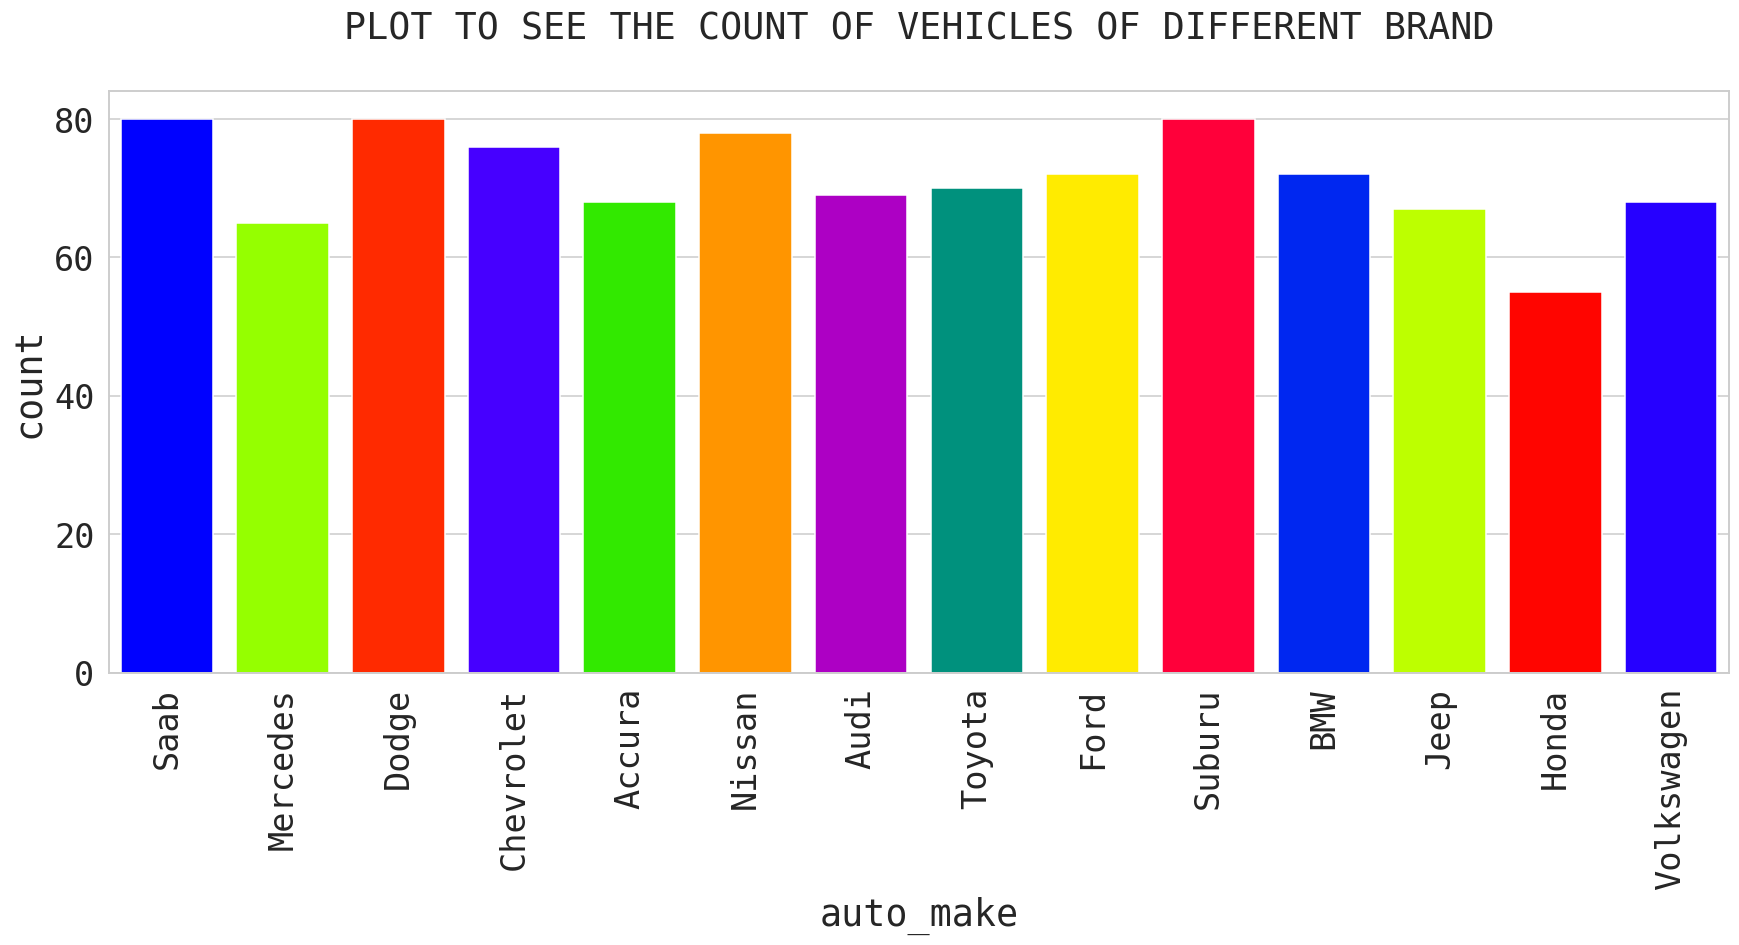

In [23]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=2)
m=sns.countplot(x='auto_make',data=ifr,orient='v',palette='prism',saturation=25)
m.set_xticklabels(m.get_xticklabels(),rotation=90)
plt.title('PLOT TO SEE THE COUNT OF VEHICLES OF DIFFERENT BRAND\n')
plt.show()

                                    SUBARU AND SAAB HAS THE HIGHEST NUMBER OF USER

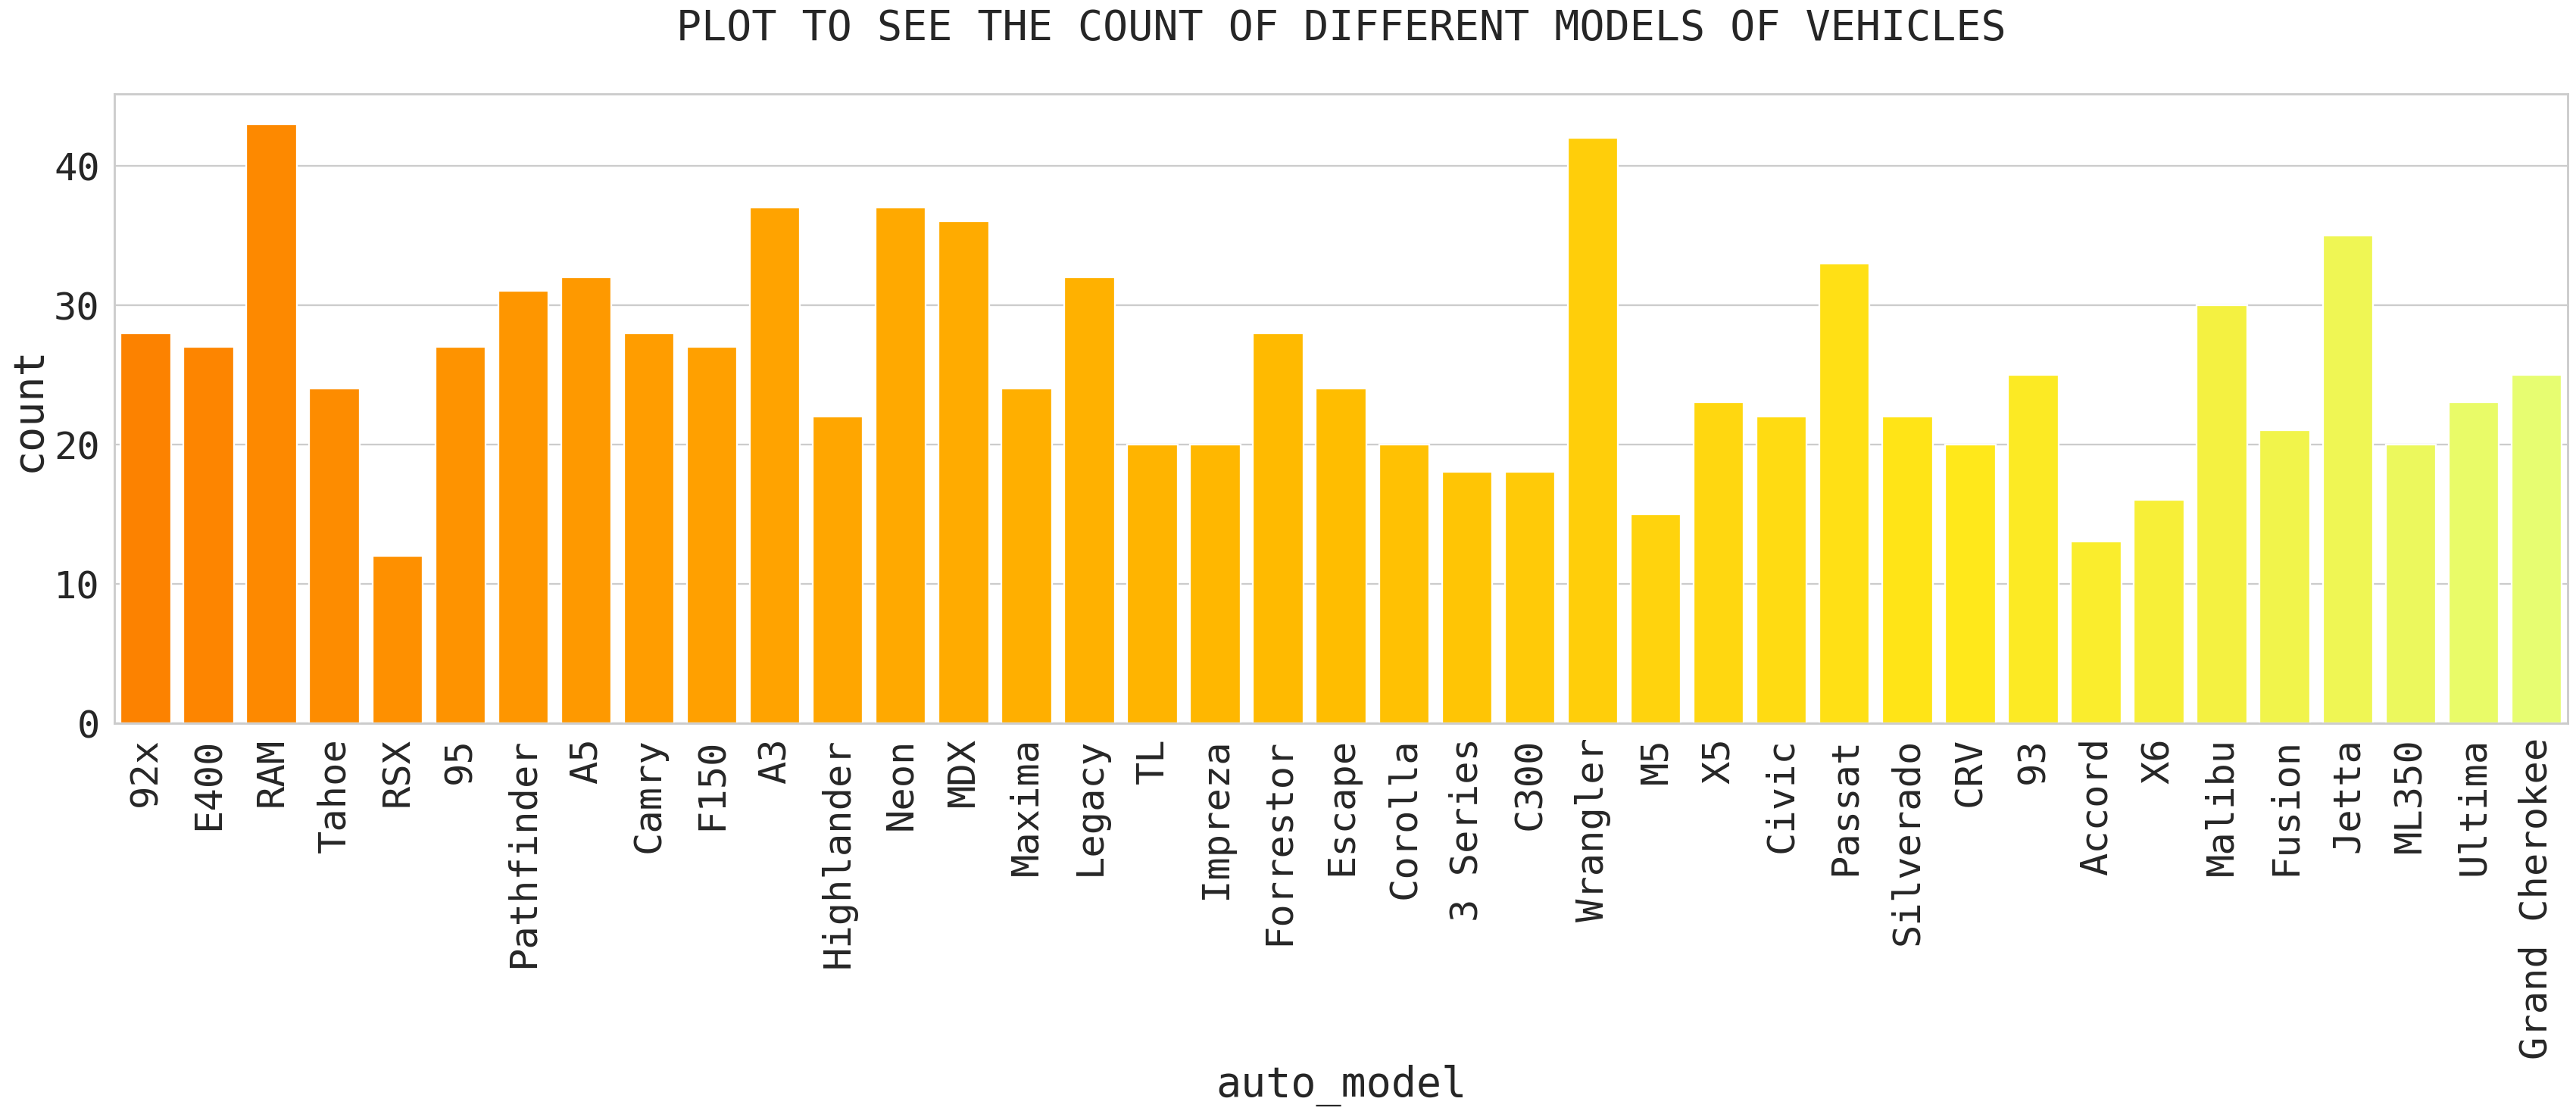

In [24]:
plt.figure(figsize=(38,10),dpi=110)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=2)
m1=sns.countplot(x='auto_model',data=ifr,orient='v',palette='Wistia_r',saturation=25)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.title('PLOT TO SEE THE COUNT OF DIFFERENT MODELS OF VEHICLES\n')
plt.show()

                                            WRANGLER AND RAM HAS HIGH USER COUNT

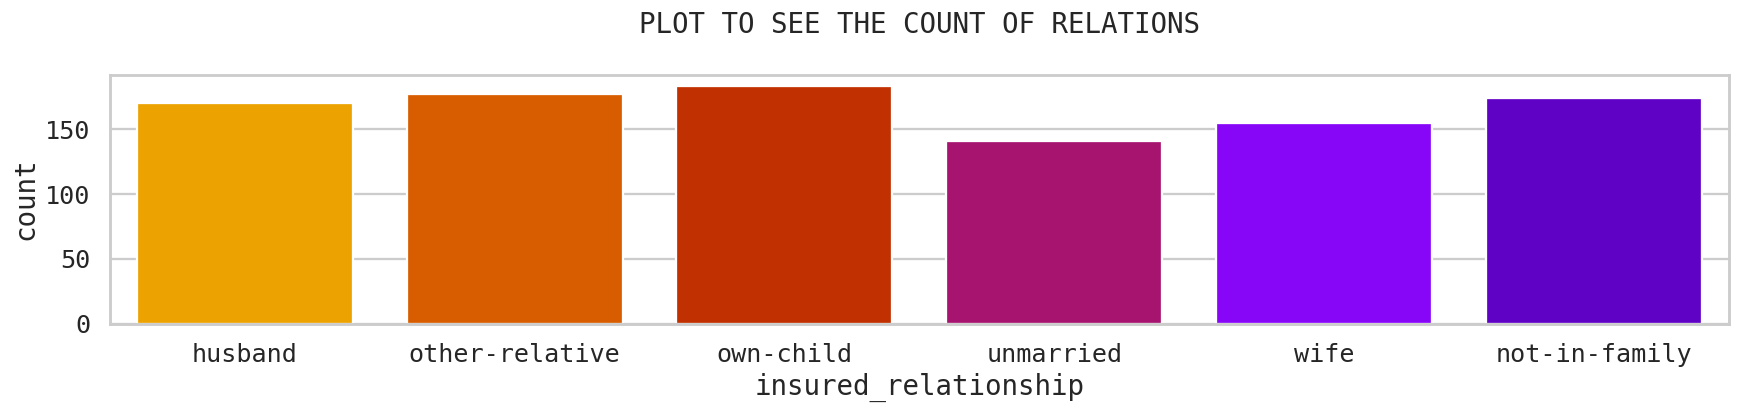

In [25]:
plt.figure(figsize=(19,3),dpi=110)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1)
sns.countplot(x='insured_relationship',data=ifr,orient='v',palette='gnuplot_r',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF RELATIONS\n')
plt.show()

                                        MAXIMUM OF THE INSURED HAVE OWN CHILD

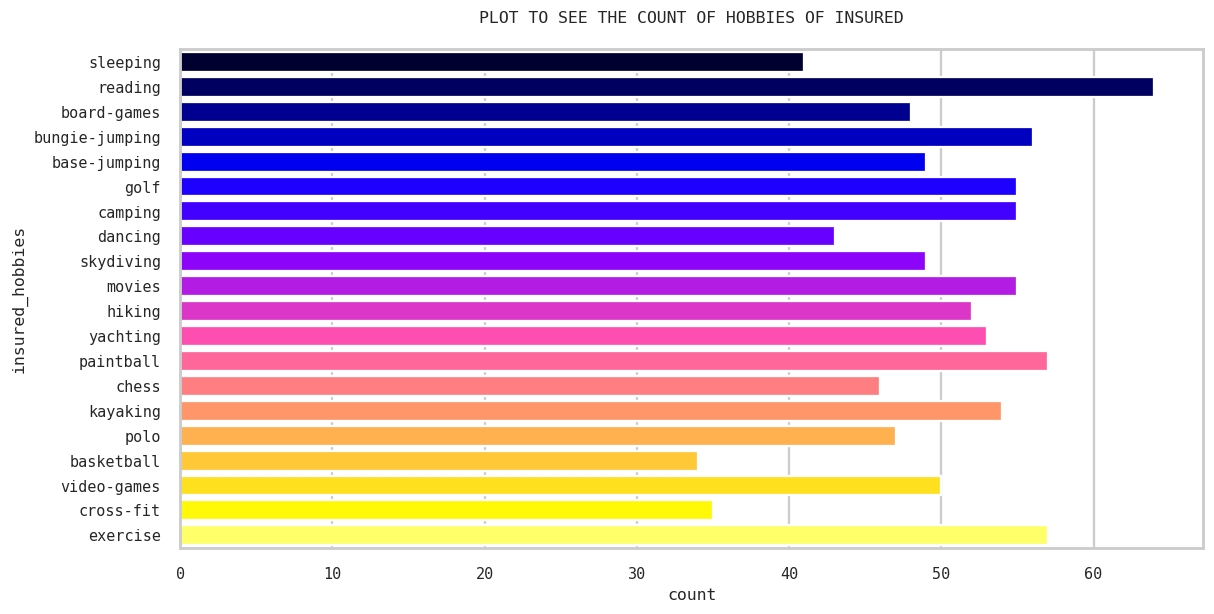

In [26]:
plt.figure(figsize=(12,6),dpi=110)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=0.6)
sns.countplot(y='insured_hobbies',data=ifr,orient='h',palette='gnuplot2',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF HOBBIES OF INSURED\n')
plt.show()

                                        MAXIMUM INSURED HAS A HOBBY OF READING

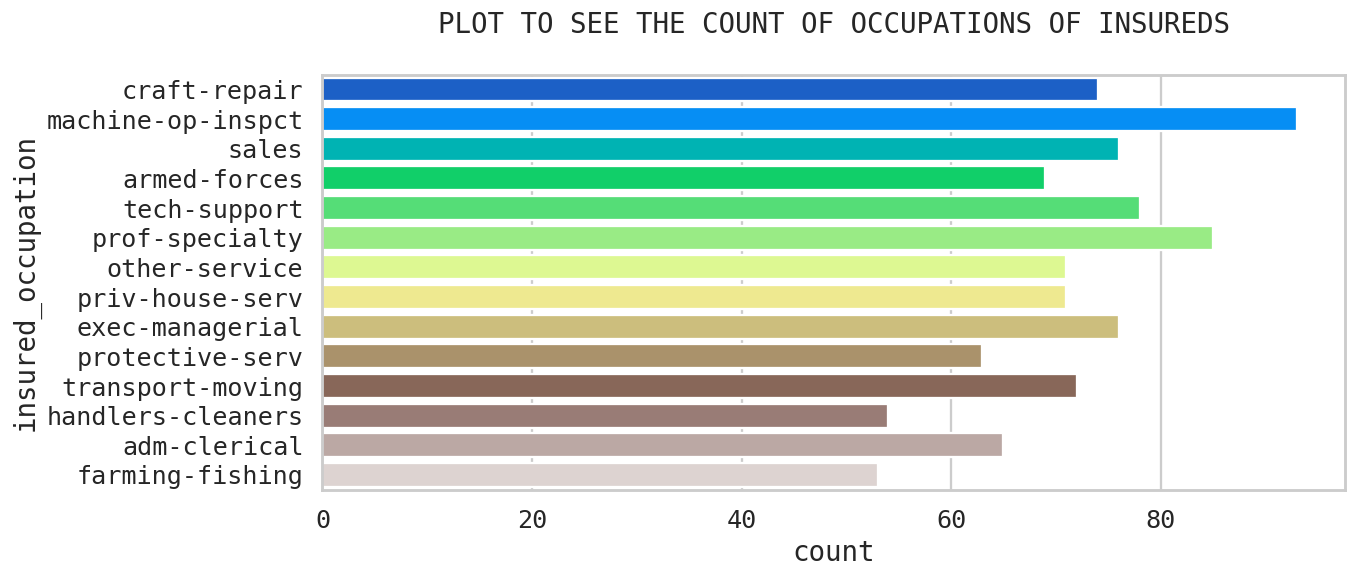

In [27]:
plt.figure(figsize=(12,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
sns.countplot(y='insured_occupation',data=ifr,orient='h',palette='terrain',saturation=55)
plt.title('PLOT TO SEE THE COUNT OF OCCUPATIONS OF INSUREDS\n')
plt.show()

                        MAXIMUM HAVE A OCCUPATION OF MACHINE OPERATOR

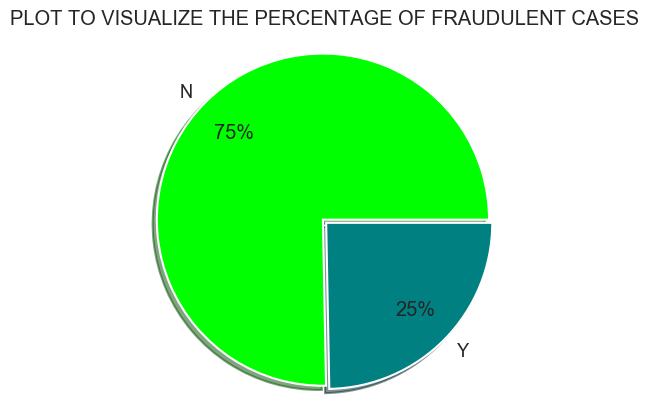

In [28]:
if_lb=ifr['fraud_reported'].value_counts().index.tolist()
if_val=ifr['fraud_reported'].value_counts().values.tolist()
exp=(0.015,0.015)
clr=('lime','teal')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF FRAUDULENT CASES')
plt.show()

                PLOT IS SHOWING THAT OUTOF 100% CLAIM 25% REPORTED TO BE A FRAUD CLAIM

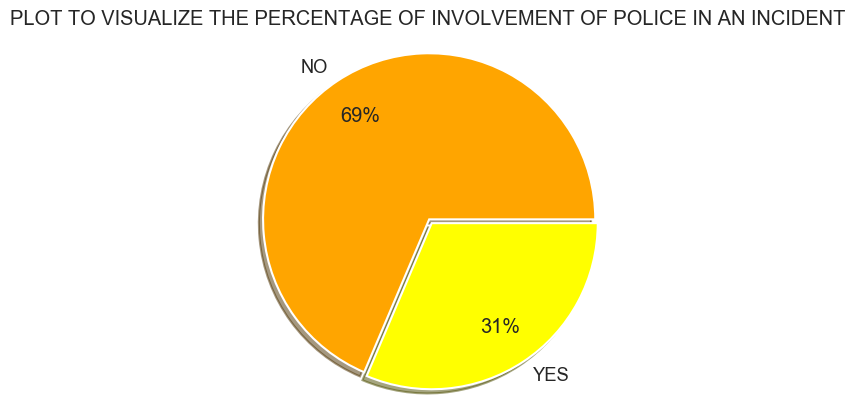

In [29]:
if_lb=ifr['police_report_available'].value_counts().index.tolist()
if_val=ifr['police_report_available'].value_counts().values.tolist()
exp=(0.015,0.015)
clr=('orange','yellow')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF INVOLVEMENT OF POLICE IN AN INCIDENT ')
plt.show()

                    PLOT IS SHOWING THAT IN WHOPPING 69% OF CASE DON'T HAVE A POLICE REPORT 

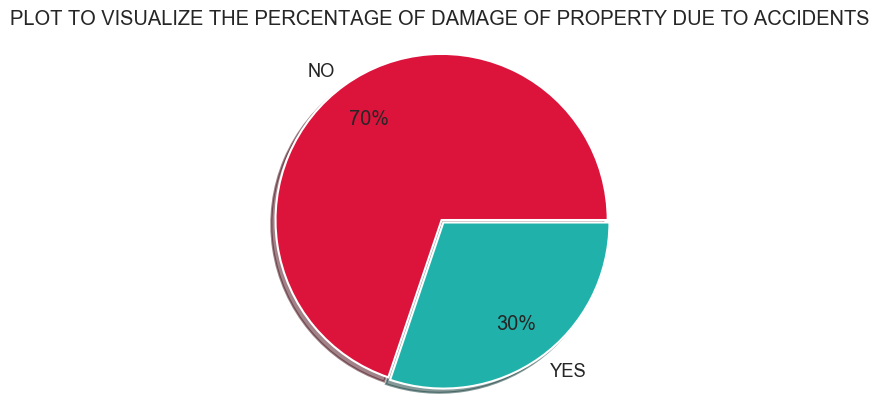

In [30]:
if_lb=ifr['property_damage'].value_counts().index.tolist()
if_val=ifr['property_damage'].value_counts().values.tolist()
exp=(0.01,0.01)
clr=('crimson','lightseagreen')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF DAMAGE OF PROPERTY DUE TO ACCIDENTS ')
plt.show()

                            PLOT IS SHOWING THAT 30% PROPERTY WERE DAMAGED DUE TO ACCIDENTS

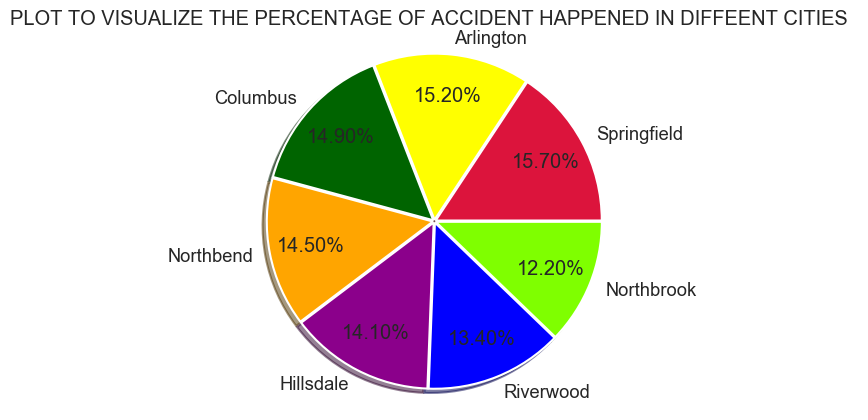

In [31]:
if_lb=ifr['incident_city'].value_counts().index.tolist()
if_val=ifr['incident_city'].value_counts().values.tolist()
exp=(0.01,0.01,0.01,0.01,0.01,0.01,0.01)
clr=('crimson','yellow','darkgreen','orange','darkmagenta','blue','chartreuse')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.2f%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF ACCIDENT HAPPENED IN DIFFEENT CITIES  ')
plt.show()

                        MAXIMUM INCIDENTS WERE REPORTED FROM 'SPRINGFIELD' & 'NORTHBROOK' AREA

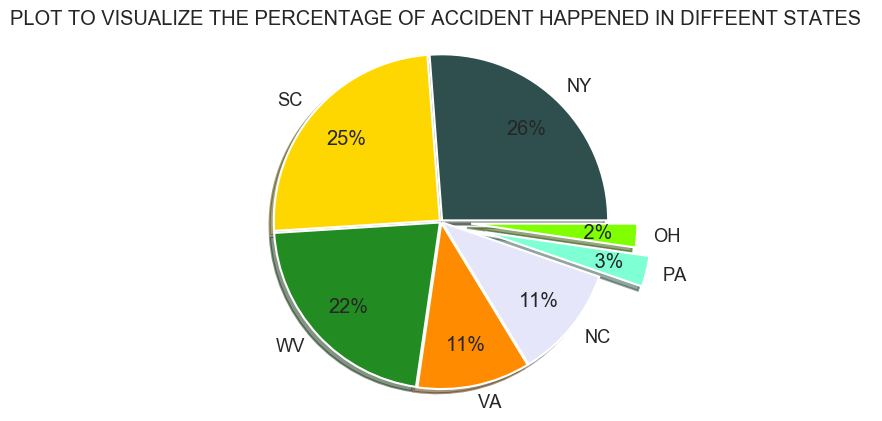

In [32]:
if_lb=ifr['incident_state'].value_counts().index.tolist()
if_val=ifr['incident_state'].value_counts().values.tolist()
exp=(0.01,0.01,0.01,0.01,0.01,0.3,0.2)
clr=('darkslategrey','gold','forestgreen','darkorange','lavender','aquamarine','chartreuse')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF ACCIDENT HAPPENED IN DIFFEENT STATES  ')
plt.show()

                            THE STATE OF NEWYORK HAVE HIGHEST NUMBERS OF REPORTED CASES

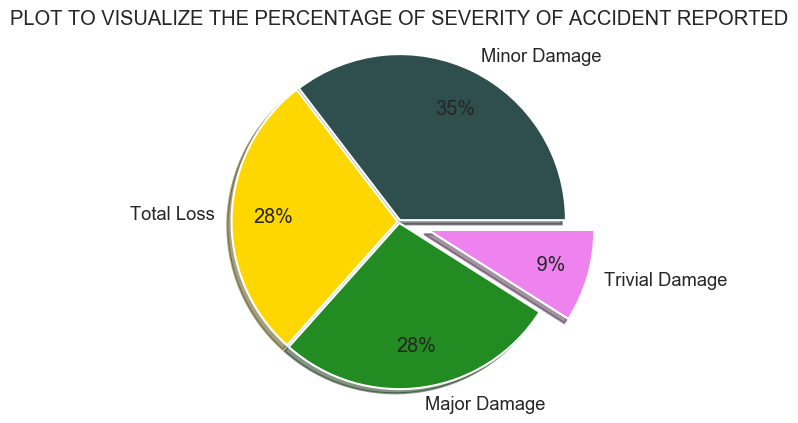

In [33]:
if_lb=ifr['incident_severity'].value_counts().index.tolist()
if_val=ifr['incident_severity'].value_counts().values.tolist()
exp=(0.01,0.01,0.01,0.2)
clr=('darkslategrey','gold','forestgreen','violet')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF SEVERITY OF ACCIDENT REPORTED')
plt.show()

                                MOST OF THE INCIDENTS RESULTED IN A MINOR DAMAGE

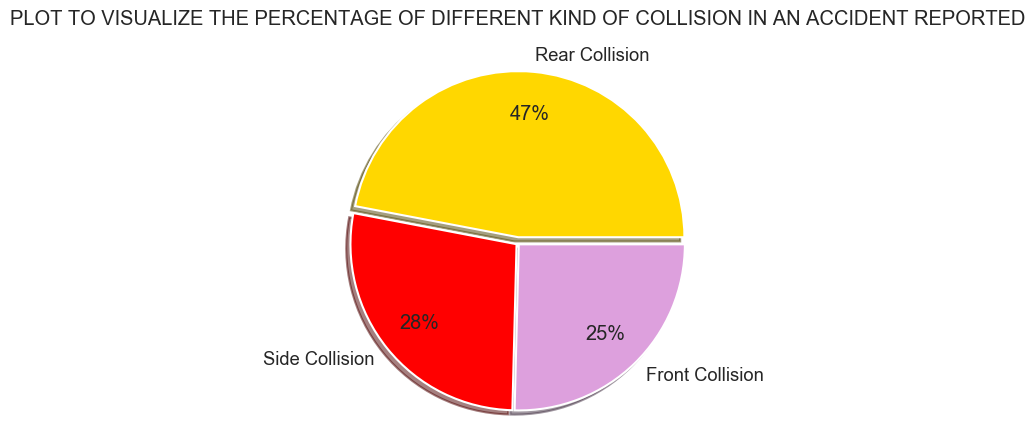

In [34]:
if_lb=ifr['collision_type'].value_counts().index.tolist()
if_val=ifr['collision_type'].value_counts().values.tolist()
exp=(0.04,0.01,0.01)
clr=('gold','red','plum')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF DIFFERENT KIND OF COLLISION IN AN ACCIDENT REPORTED\n')
plt.show()

                                    MAXIMUM ACCIDENTS WERE DUR TO REAR COLLISION

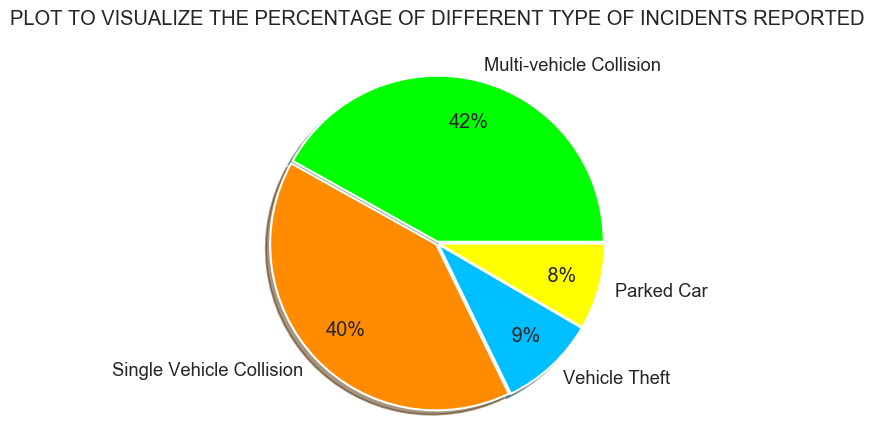

In [35]:
if_lb=ifr['incident_type'].value_counts().index.tolist()
if_val=ifr['incident_type'].value_counts().values.tolist()
exp=(0.01,0.01,0.01,0.01)
clr=('lime','darkorange','deepskyblue','yellow')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF DIFFERENT TYPE OF INCIDENTS REPORTED\n')
plt.show()

                            MOST OF THE REPORTED ACCIDENT WERE MULTI VEHICLE COLLISION

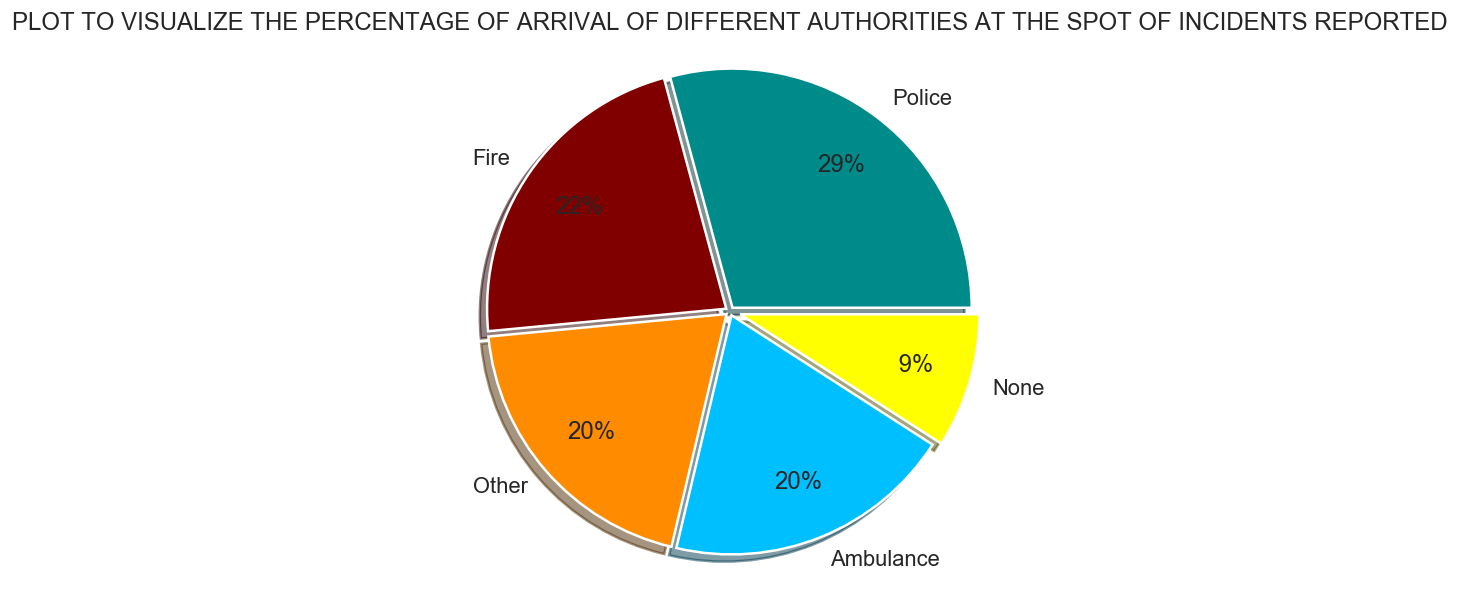

In [36]:
if_lb=ifr['authorities_contacted'].value_counts().index.tolist()
if_val=ifr['authorities_contacted'].value_counts().values.tolist()
exp=(0.02,0.02,0.02,0.02,0.05)
clr=('darkcyan','maroon','darkorange','deepskyblue','yellow')
plt.figure(figsize=(10,6),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF ARRIVAL OF DIFFERENT AUTHORITIES AT THE SPOT OF INCIDENTS REPORTED')
plt.show()

                                ARRIVAL OF POLICE AUTHORITIES IS HIGHEST AMONG ALL

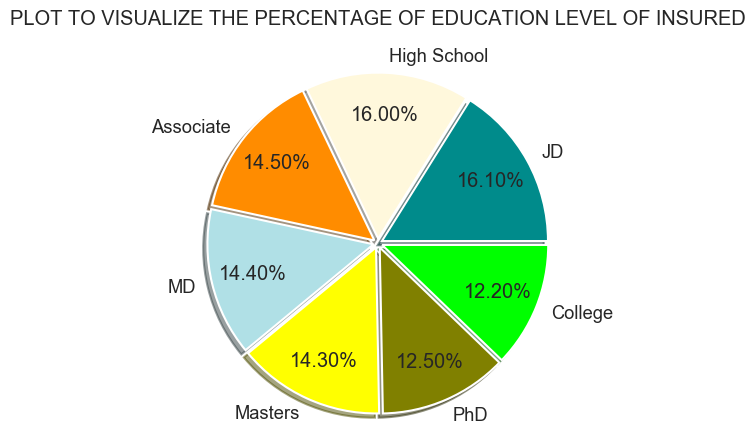

In [37]:
if_lb=ifr['insured_education_level'].value_counts().index.tolist()
if_val=ifr['insured_education_level'].value_counts().values.tolist()
exp=(0.03,0.03,0.03,0.03,0.03,0.03,0.03)
clr=('darkcyan','cornsilk','darkorange','powderblue','yellow','olive','lime')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.2f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF EDUCATION LEVEL OF INSURED\n')
plt.show()

            PLOT SHOWS THAT MAXIMUM PEOPLE HAVE A QUALIFICATION OF JD OR HIGH SCHOOL

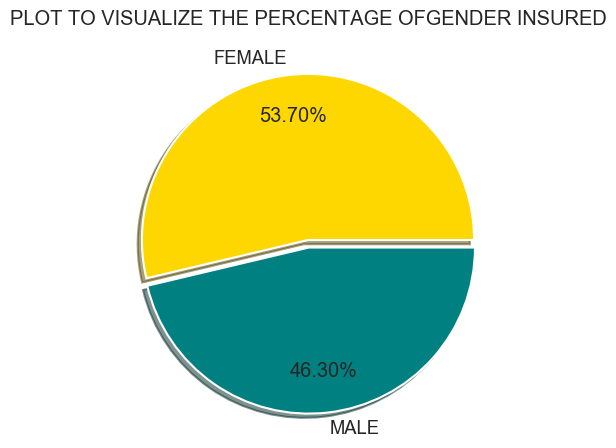

In [38]:
if_lb=ifr['insured_sex'].value_counts().index.tolist()
if_val=ifr['insured_sex'].value_counts().values.tolist()
exp=(0.025,0.025)
clr=('gold','teal')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.2f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OFGENDER INSURED\n')
plt.show()

                            MAXIMUM INSURED ARE FEMALE

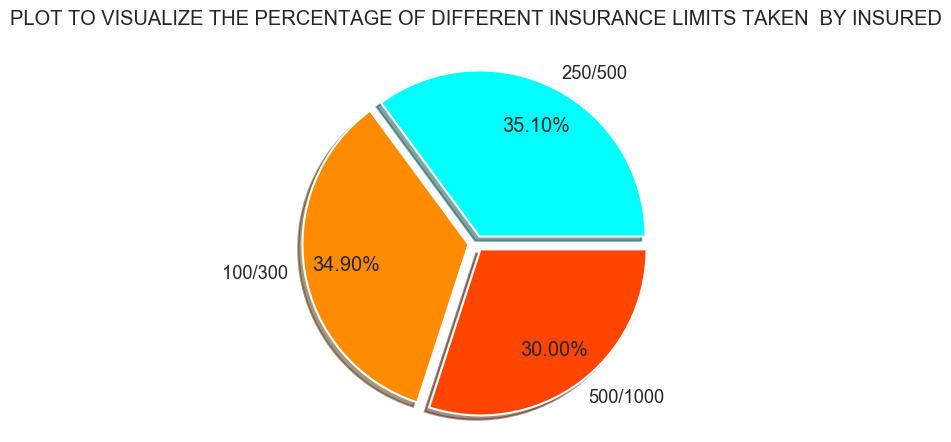

In [39]:
if_lb=ifr['policy_csl'].value_counts().index.tolist()
if_val=ifr['policy_csl'].value_counts().values.tolist()
exp=(0.05,0.05,0.05)
clr=('cyan','darkorange','orangered')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.pie(x=if_val,explode=exp,labels=if_lb,colors=clr,autopct='%2.2f%%',pctdistance=0.75,shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF DIFFERENT INSURANCE LIMITS TAKEN  BY INSURED\n')
plt.show()

                                    MAX OF THE INSURED OPT FOR SPLIT LIMIT OF 250/500

In [40]:
#creating a single column for auto_make and auto_model as they represent  a single type i.e. brand name and its model
ifr['vehicle']=ifr['auto_make']+['_']+ifr['auto_model']

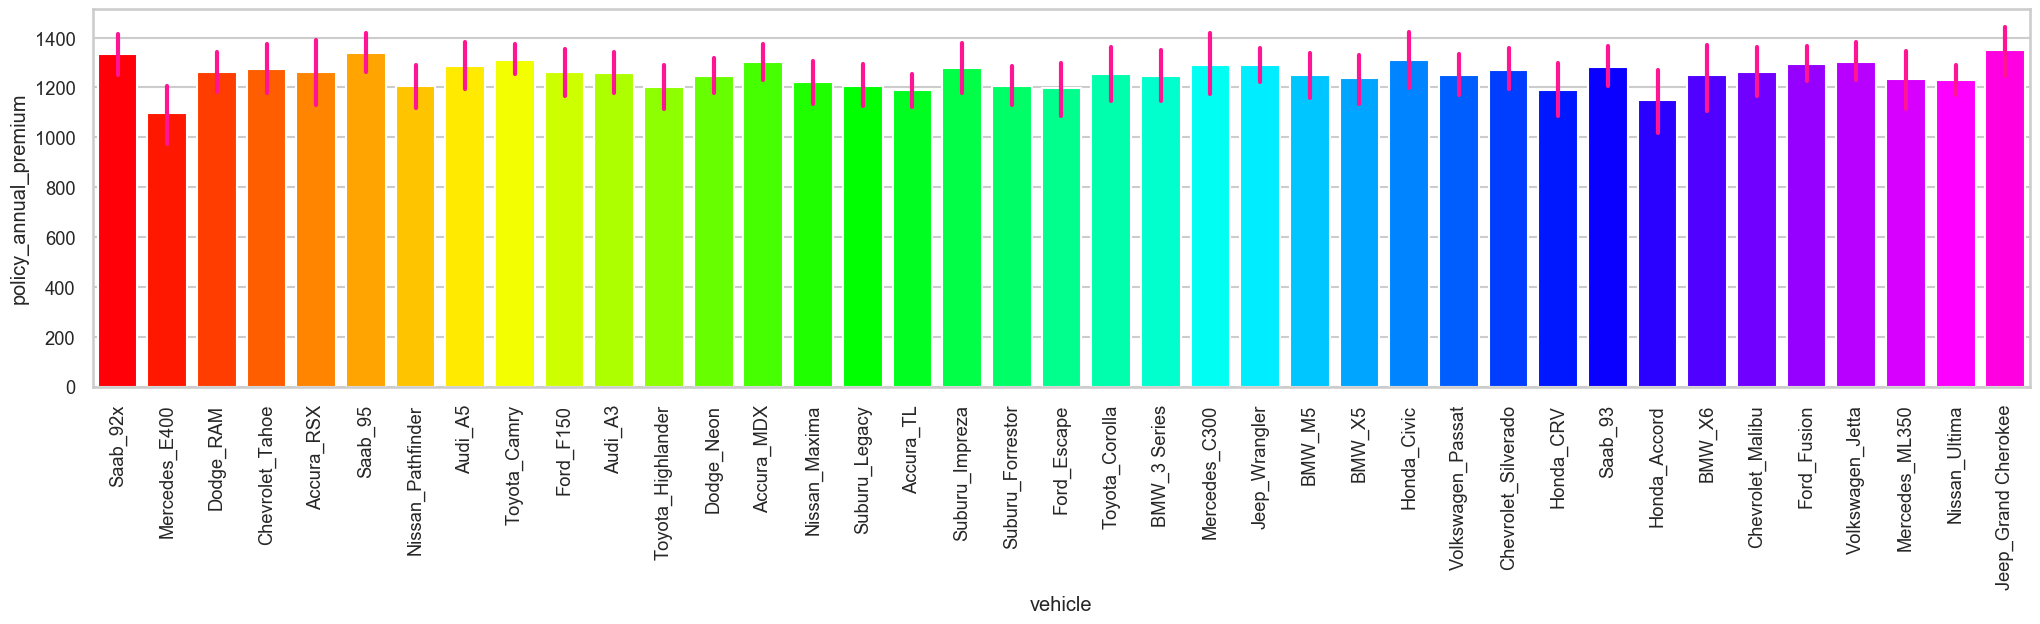

In [41]:
plt.figure(figsize=(25,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
m=sns.barplot(x='vehicle',y='policy_annual_premium',data=ifr,ci=95,orient='v',palette='gist_rainbow',saturation=25,errcolor='deeppink',errwidth=3)
m.set_xticklabels(m.get_xticklabels(),rotation=90)
plt.show()

In [42]:
#dropping auto_make and auto_model as we got our single column comprise of auto_make and auto_model
ifr.drop(['auto_make','auto_model'],axis=1,inplace=True)

In [43]:
#mapping values
m1={'FEMALE':0,'MALE':1}
ifr['insured_sex']=ifr['insured_sex'].map(m1)

m2={'YES':1,'NO':0}
ifr['property_damage']=ifr['property_damage'].map(m2)
ifr['police_report_available']=ifr['police_report_available'].map(m2) 

m3={'Y':1,"N":0}
ifr['fraud_reported']=ifr['fraud_reported'].map(m3) 

In [44]:
#labelencoding all the object type attributes
for i in ifr.columns:
    if ifr[i].dtypes=='object':
        ll=LabelEncoder()
        ifr[i]=ll.fit_transform(ifr[i])

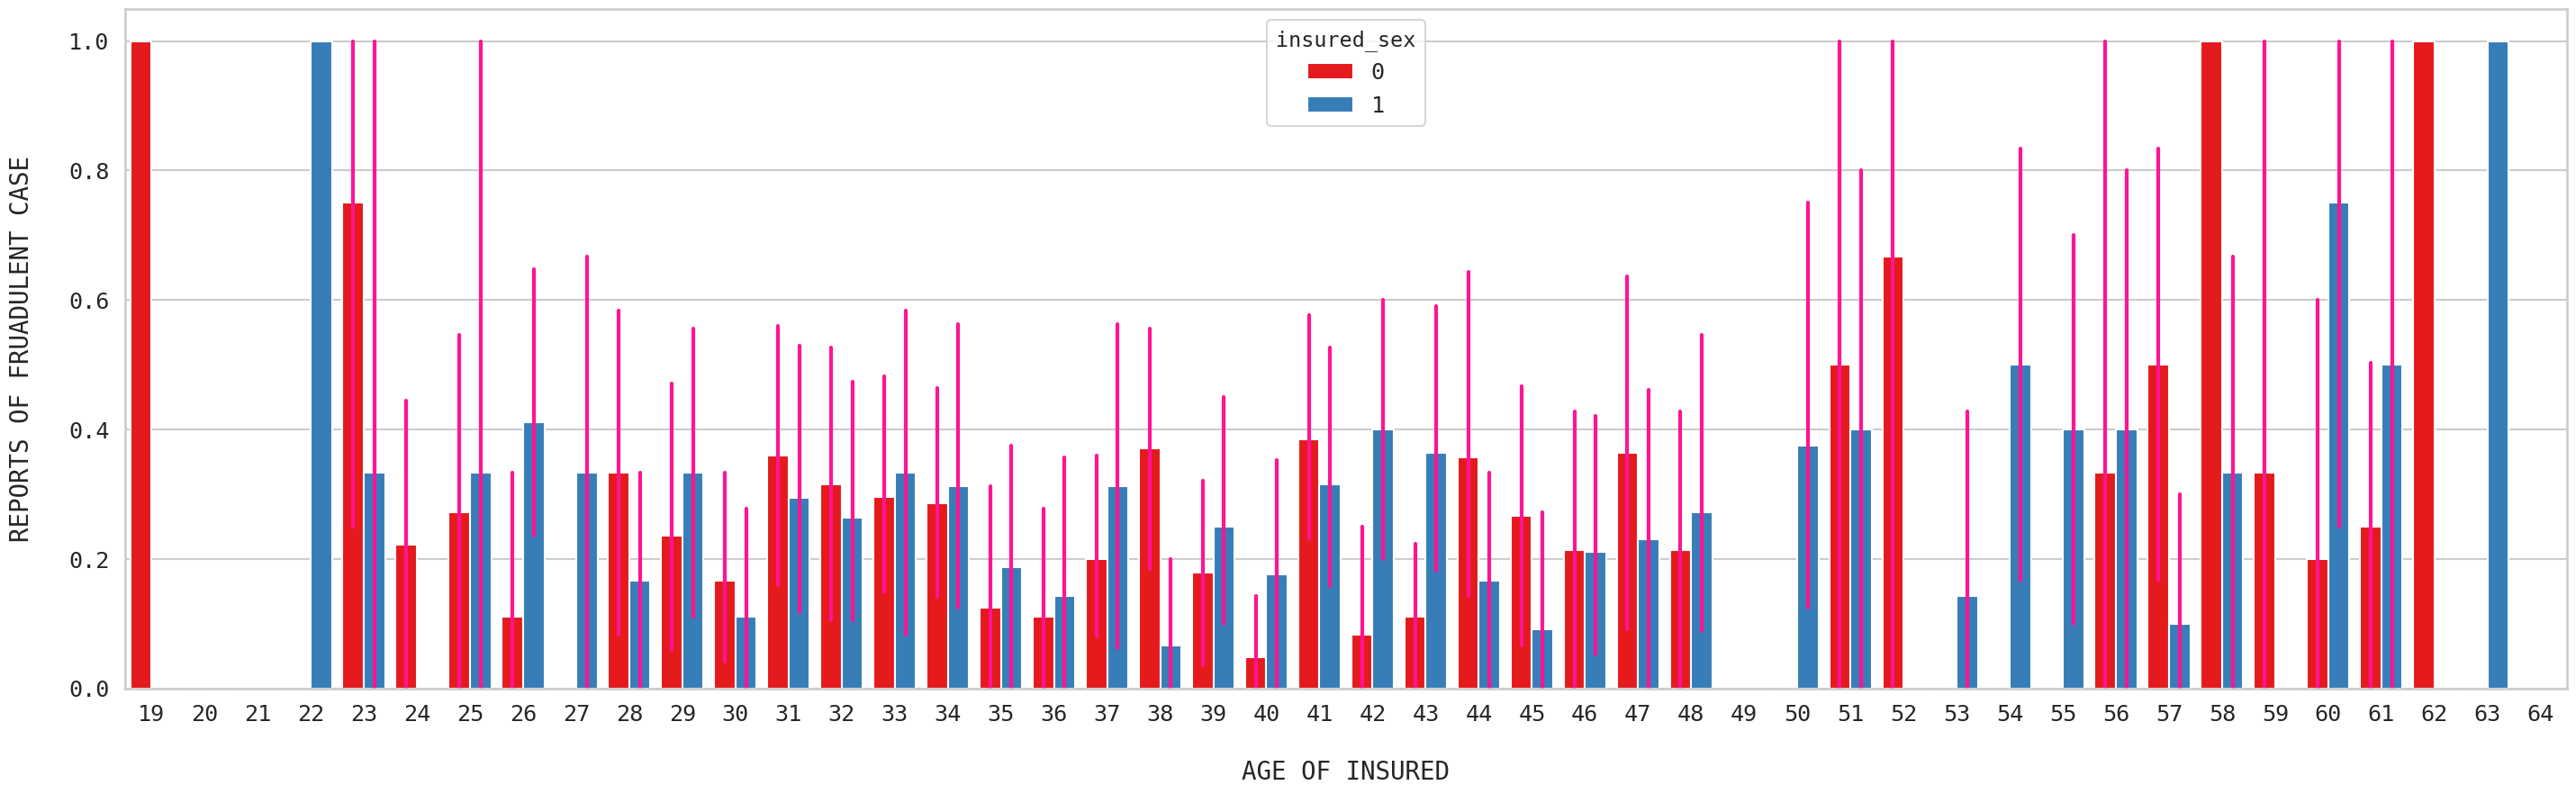

In [45]:
plt.figure(figsize=(35,10),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.1)
sns.barplot(x='age',y='fraud_reported',hue='insured_sex',data=ifr,ci=95,orient='v',palette='Set1',saturation=25,errcolor='deeppink',errwidth=3)
plt.xlabel('\nAGE OF INSURED')
plt.ylabel('REPORTS OF FRUADULENT CASE\n')
plt.show()

                             HIGHEST NUMBER FRAUDULENT CASES WERE FROM TO AGE OF 19,22,58,62,64

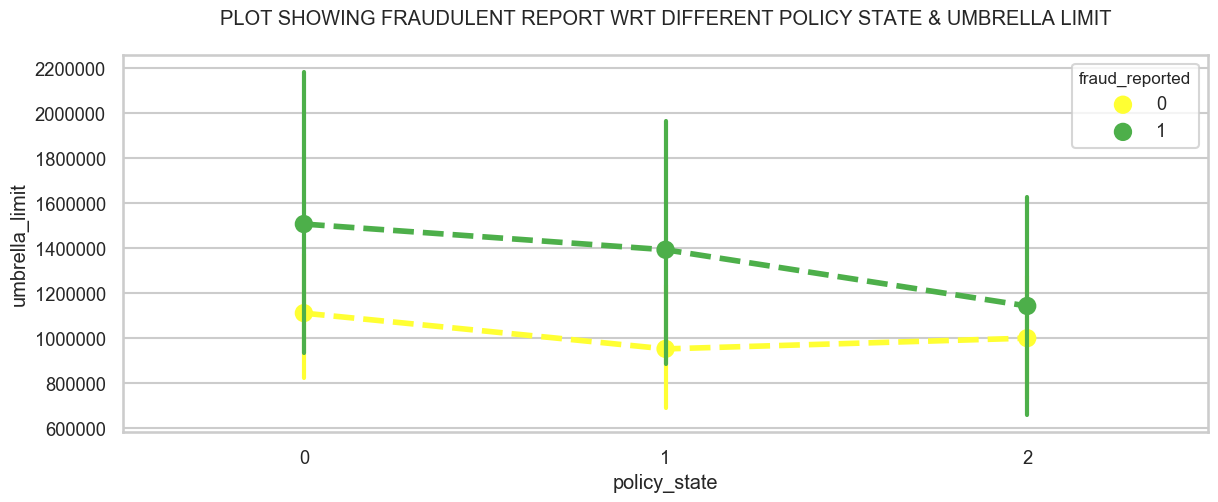

In [46]:
plt.figure(figsize=(14,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.pointplot(x='policy_state',y='umbrella_limit',hue='fraud_reported',data=ifr,ci=95,markers='o',linestyles='--',join=True,scale=1,orient='v',palette='Set1_r',errwidth='3')
plt.title('PLOT SHOWING FRAUDULENT REPORT WRT DIFFERENT POLICY STATE & UMBRELLA LIMIT\n')
plt.show()

                                HIGHER UMBRELLA LIMIT HAVE HIGHER NUMBER OF FRUDULENT CASES

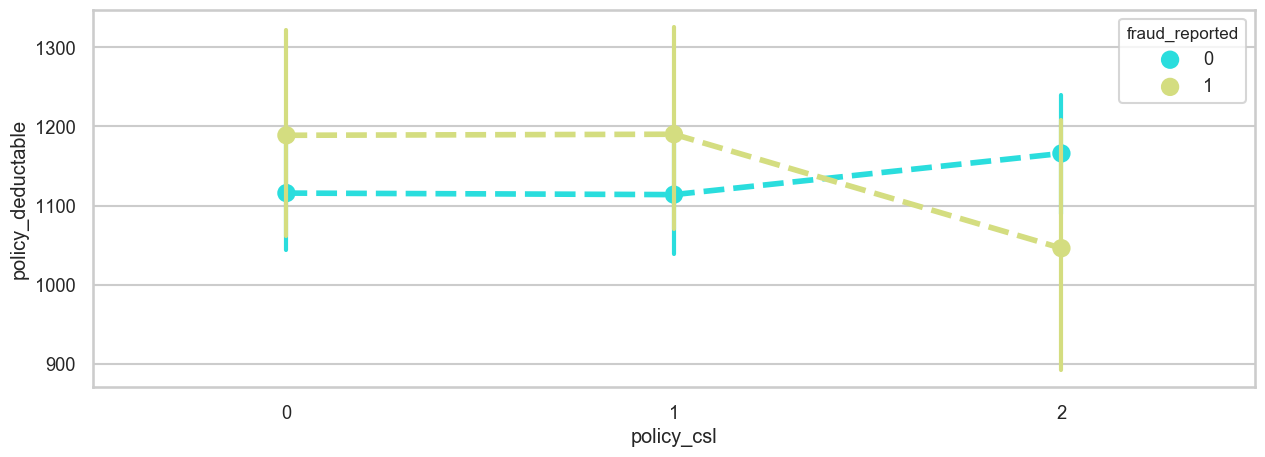

In [47]:
plt.figure(figsize=(15,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.pointplot(x='policy_csl',y='policy_deductable',hue='fraud_reported',data=ifr,ci=95,markers='o',linestyles='--',join=True,scale=1,orient='v',palette='rainbow',errwidth='3')
plt.show()

                    AT POLICY SPLIT LIMIT OF 250/500(1) & 100/300(0) HAVE HIGHER NUMBERS OF FRAUDULENT REPORTS

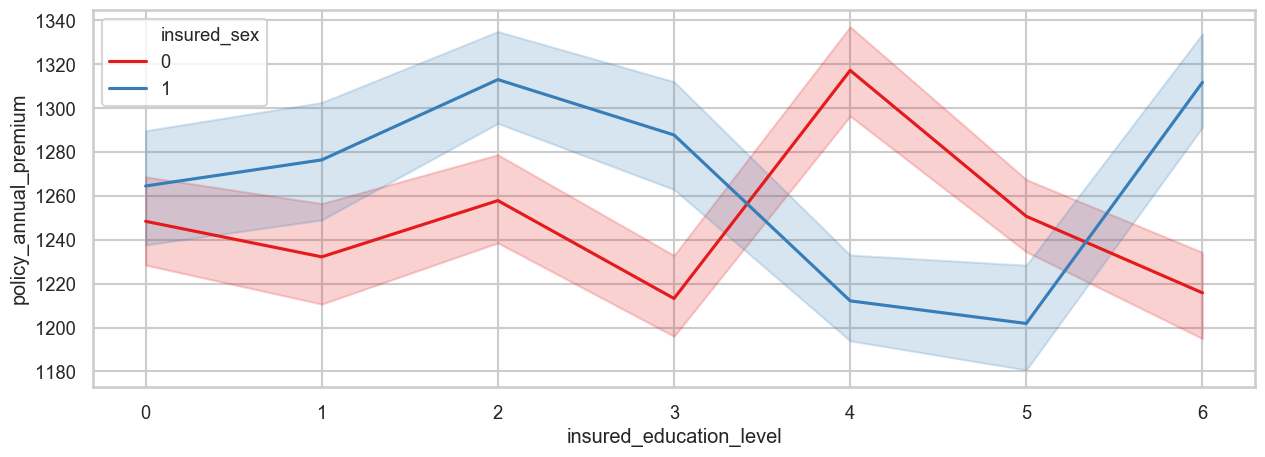

In [48]:
plt.figure(figsize=(15,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.lineplot(x='insured_education_level',y='policy_annual_premium',hue='insured_sex',data=ifr,palette='Set1',dashes=True,markers='2',estimator='mean',ci=55,err_style='band')
plt.show()

                 ANNUAL PREMIUM FOR POLICY FOR FEMALE WITH EDUCATIONAL QUALIFICATION OF MD(4) IS HIGHER 

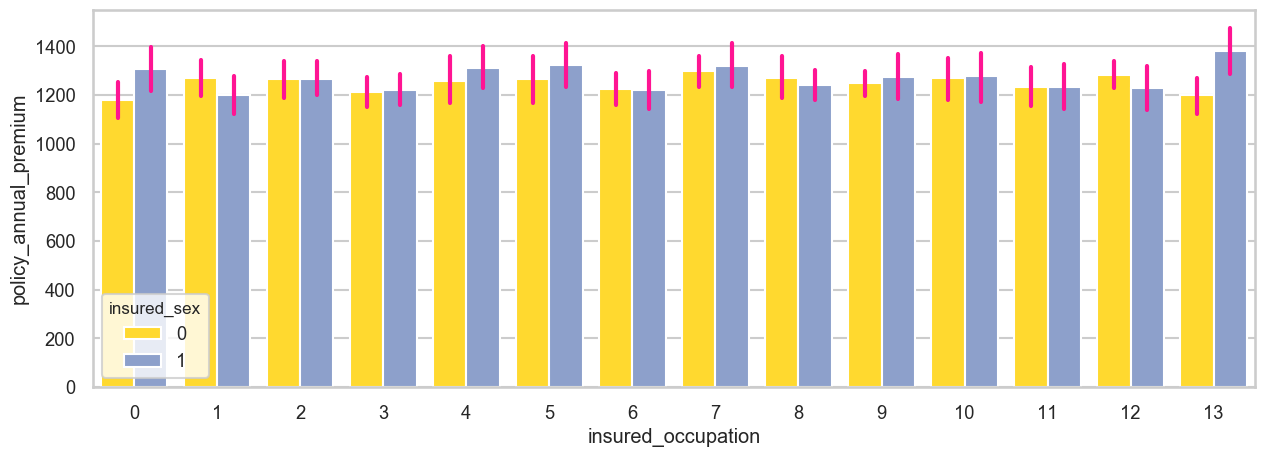

In [49]:
plt.figure(figsize=(15,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.barplot(x='insured_occupation',y='policy_annual_premium',hue='insured_sex',data=ifr,ci=95,orient='v',palette='Set2_r',saturation=25,errcolor='deeppink',errwidth=3)
plt.show()

                        A HIGH ANUAL PREMIUM WERE GIVEN BY MALES WITH OCCUPATION OF TRANSPORT MOVING

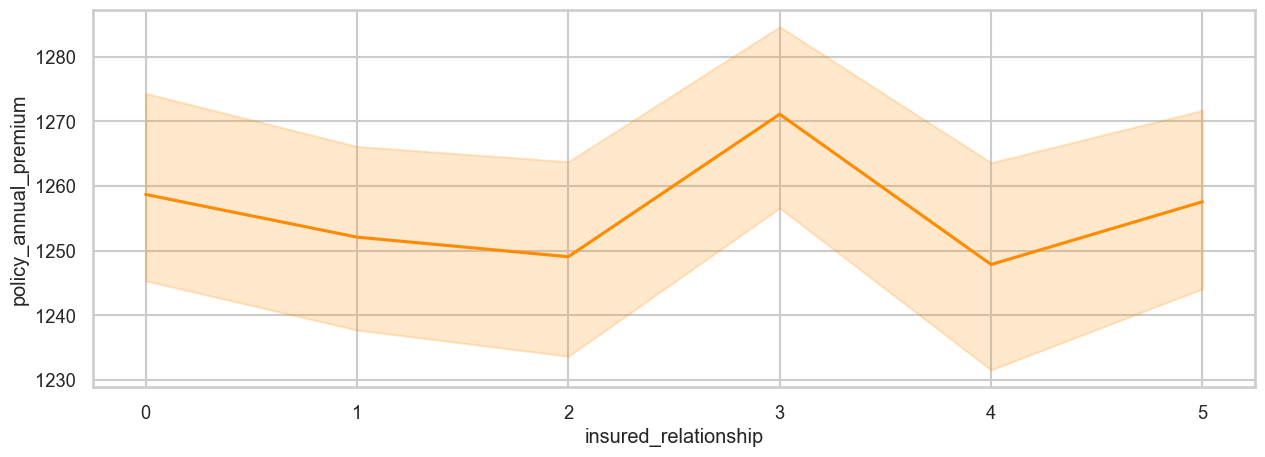

In [50]:
plt.figure(figsize=(15,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.lineplot(x='insured_relationship',y='policy_annual_premium',data=ifr,color='darkorange',dashes=True,markers='2',estimator='mean',ci=55,err_style='band')
plt.show()

                            A HIGH ANNUAL PREMIUM WERE RECEIVED FROM INSURED WITH OWN CHILD

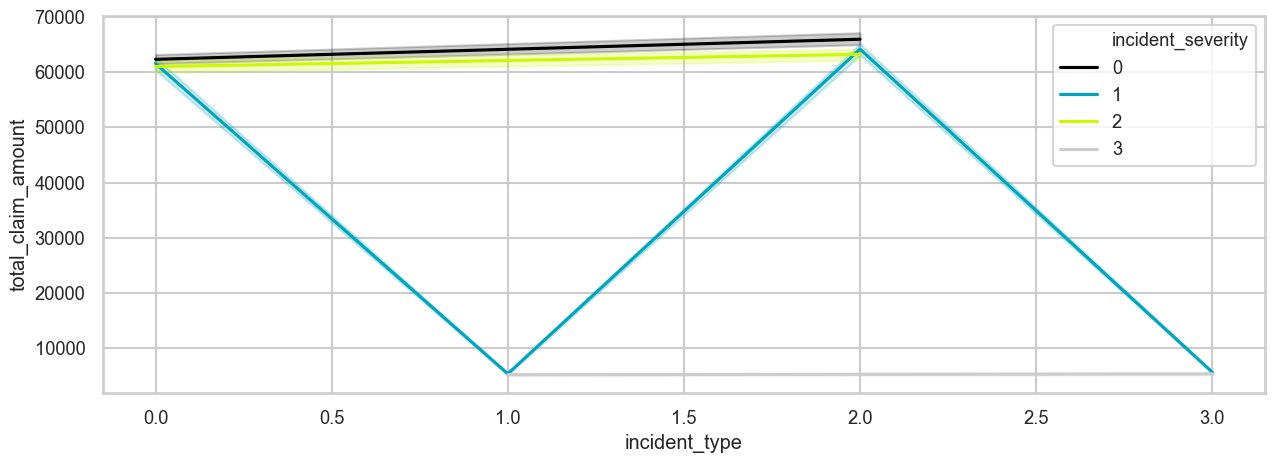

In [51]:
plt.figure(figsize=(15,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.lineplot(x='incident_type',y='total_claim_amount',hue='incident_severity',data=ifr,palette='nipy_spectral',dashes=True,markers='2',estimator='mean',ci=55,err_style='band')
plt.show()

                        MINOR DAMAGE DUE TO PARKED CAR(1) & SINGLE VEHICLE COLLISION CLAIM AMOUNT IS LOW

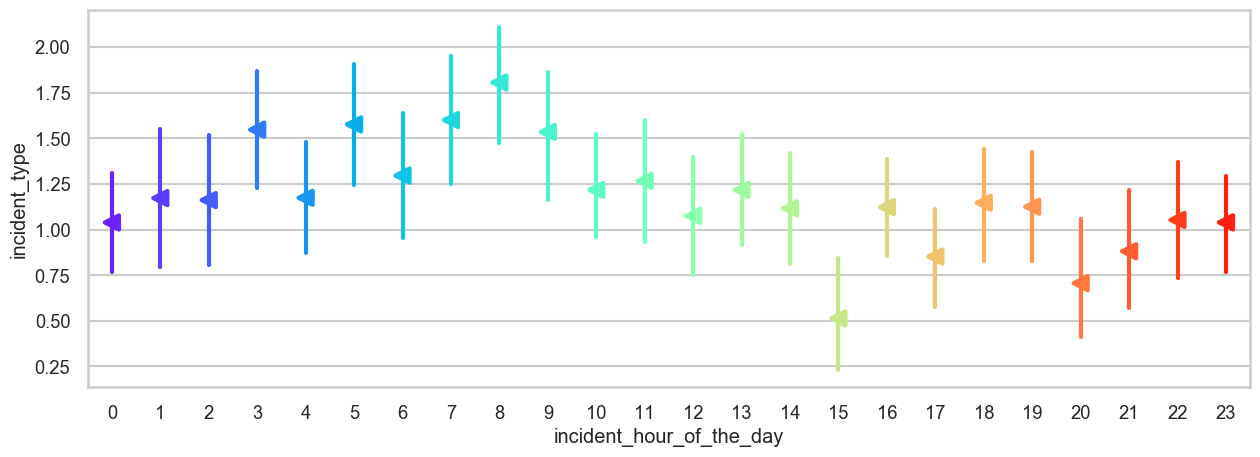

In [52]:
plt.figure(figsize=(15,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.pointplot(x='incident_hour_of_the_day',y='incident_type',data=ifr,ci=95,markers='<',linestyles='--',join=False,scale=1,orient='v',palette='rainbow',errwidth='3')
plt.show()

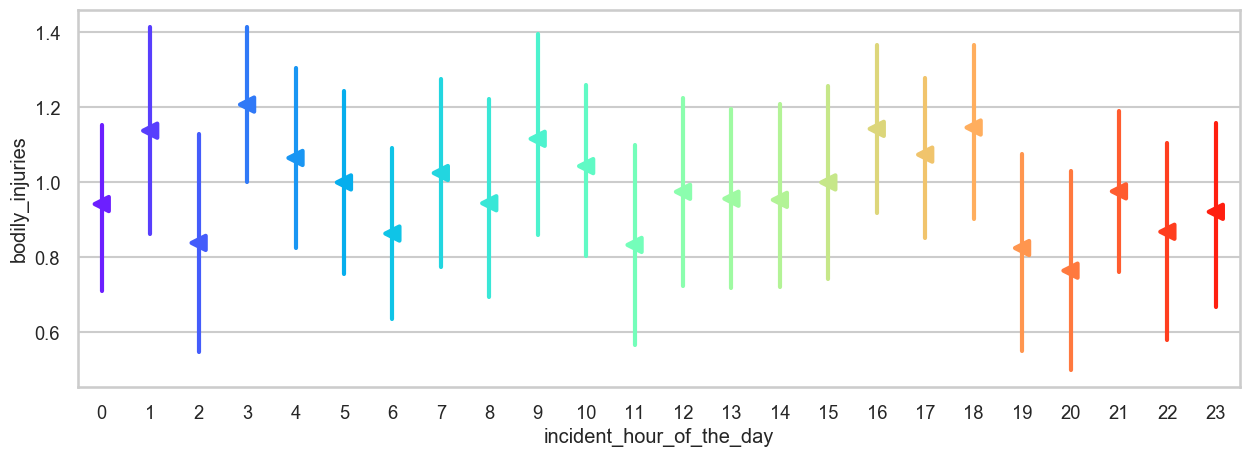

In [53]:
plt.figure(figsize=(15,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.pointplot(x='incident_hour_of_the_day',y='bodily_injuries',data=ifr,ci=95,markers='<',linestyles='--',join=False,scale=1,orient='v',palette='rainbow',errwidth='3')
plt.show()

In [54]:
#dropping unwanted column before procedding further
ifr.drop(['months_as_customer','insured_hobbies','incident_hour_of_the_day',
          'incident_state','incident_city','incident_hour_of_the_day'],axis=1,inplace=True)

In [55]:
cl=ifr.columns.values
cl

array(['age', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported',
       'vehicle'], dtype=object)

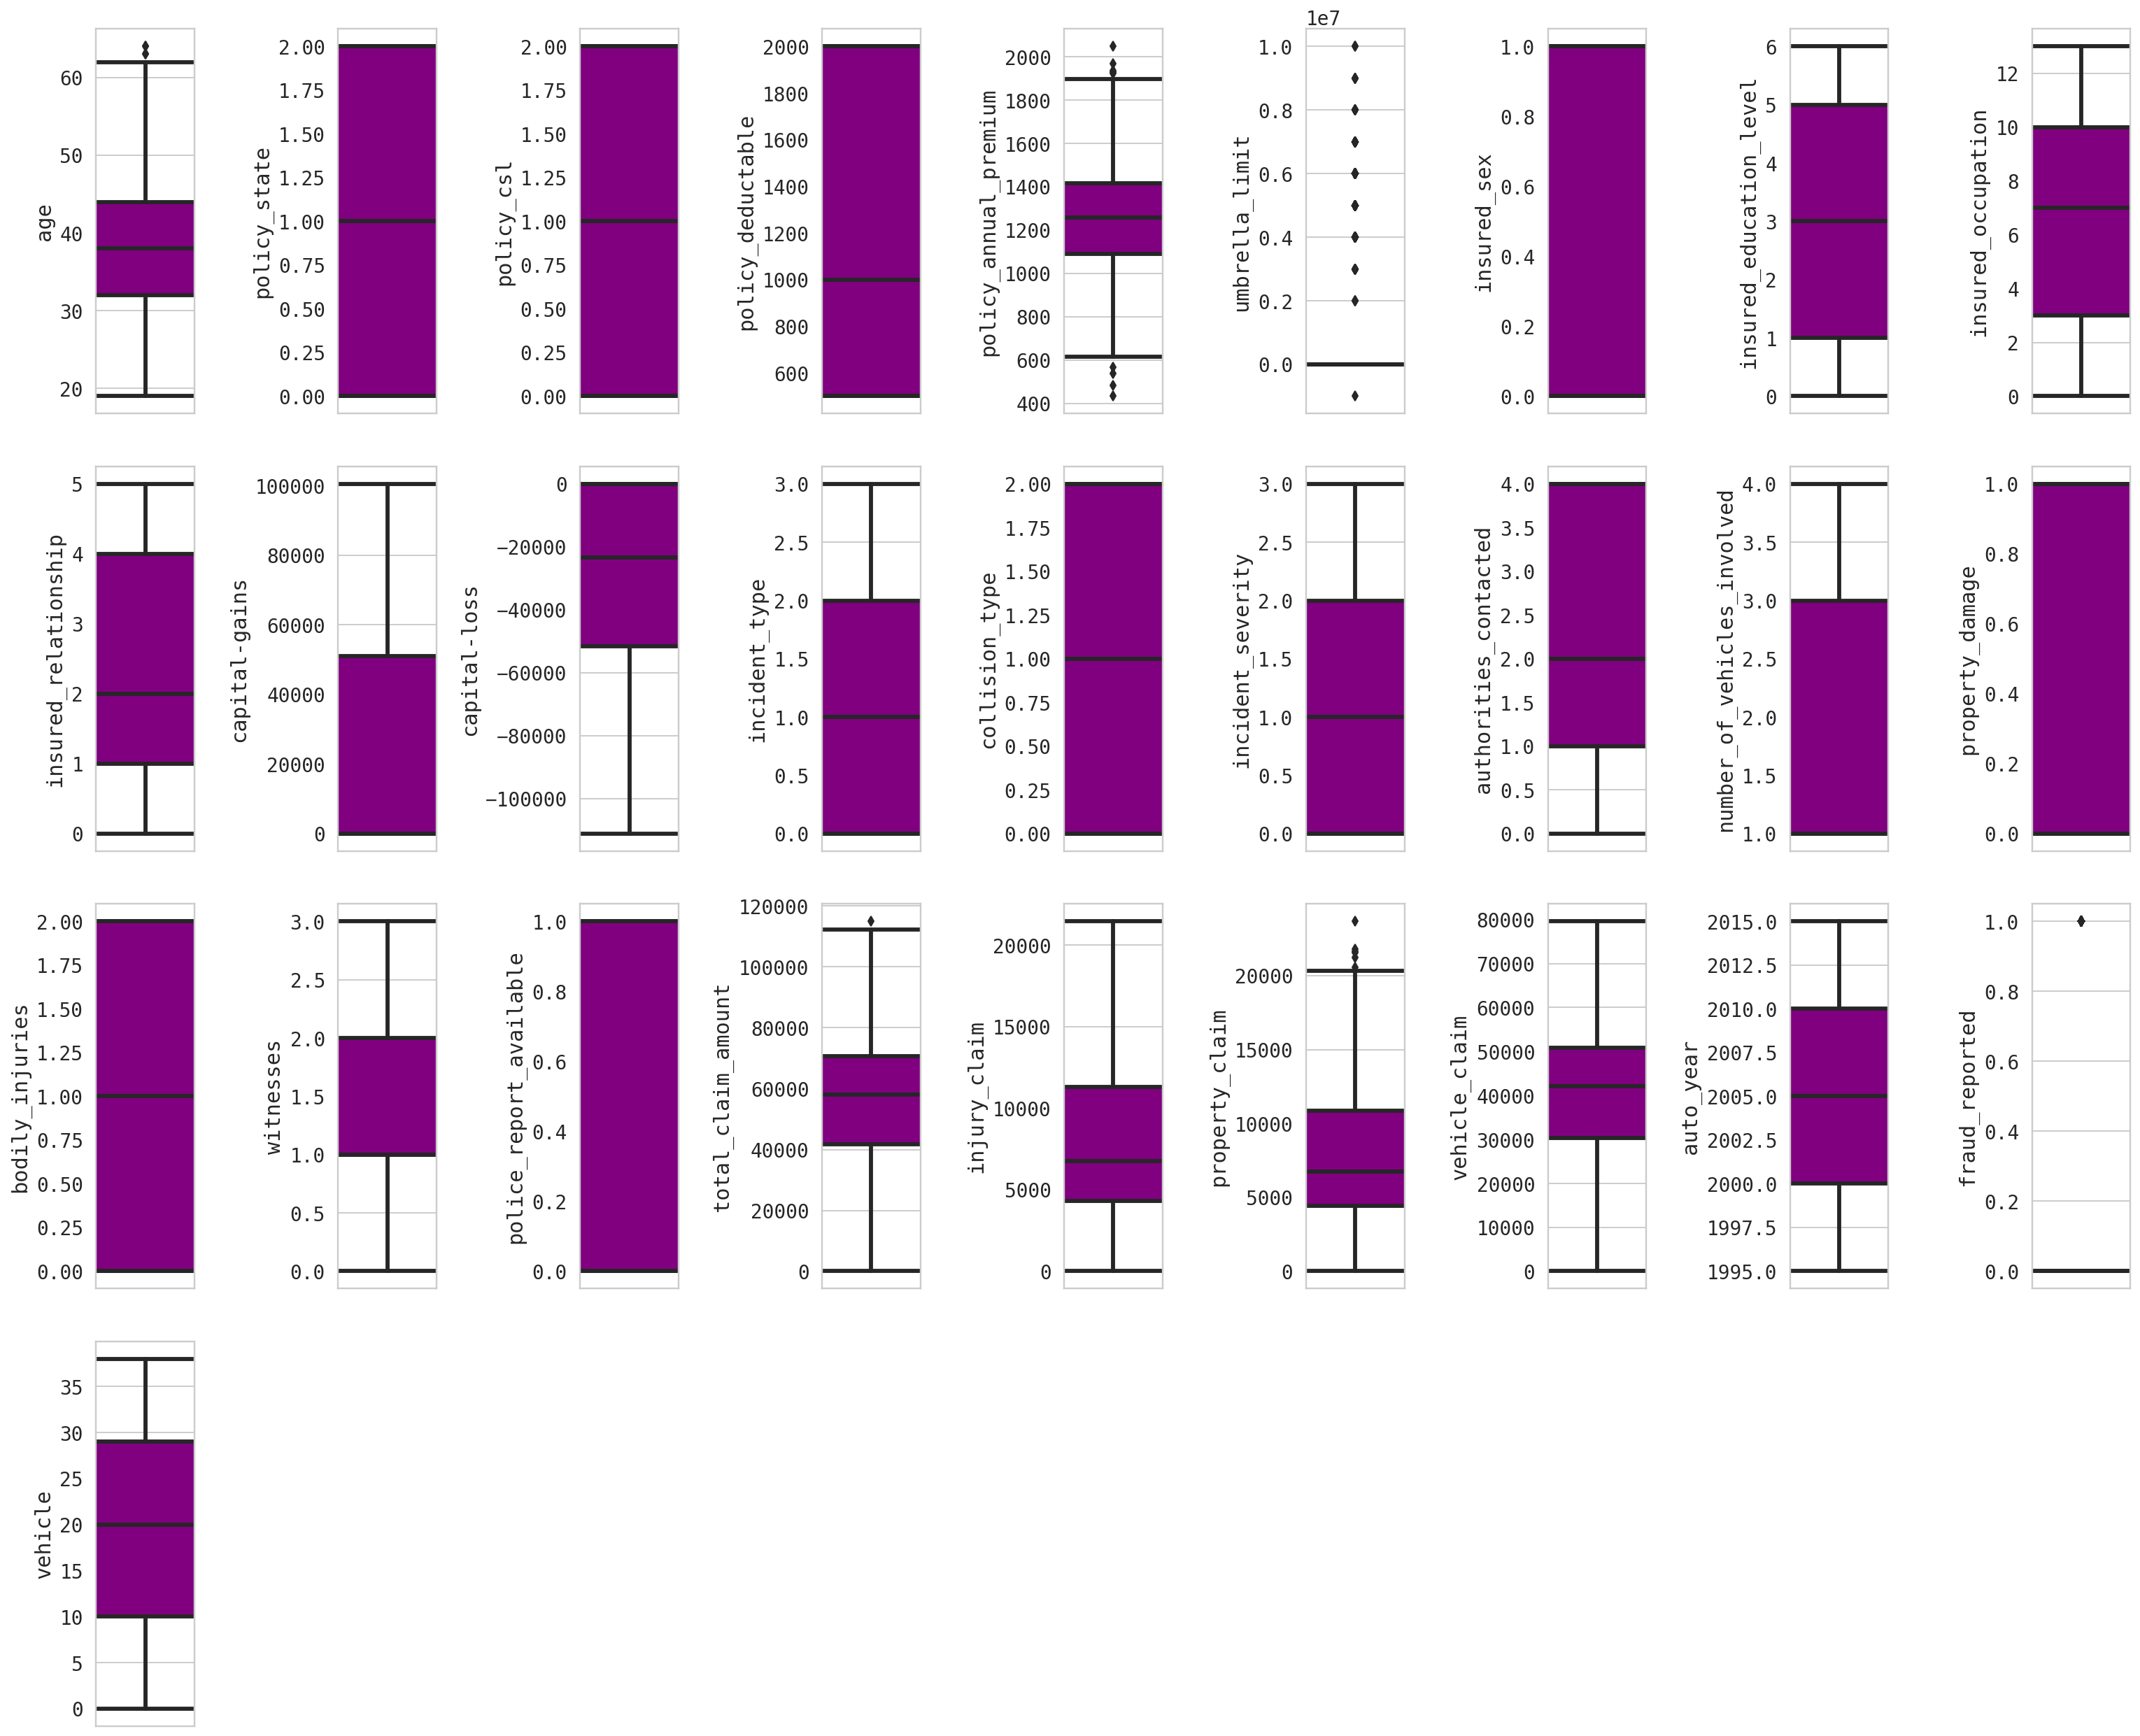

In [56]:
#plotting boxplot to visualize outliers
plt.figure(figsize=(22,18),dpi=140)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,28):
    plt.subplot(4,9,i+1)
    sns.boxplot(ifr[cl[i]],orient='v',color='purple',saturation=15,width=2,linewidth=3)
plt.tight_layout()

In [57]:
zsc=np.abs(zscore(ifr))
zsc

array([[0.99083647, 1.18717314, 0.06093665, ..., 0.1834404 , 1.74601919,
        0.7583011 ],
       [0.33407345, 0.01685641, 0.06093665, ..., 0.31549088, 1.74601919,
        0.31870626],
       [1.08891308, 1.18717314, 1.18266843, ..., 0.31549088, 0.57273139,
        0.56048342],
       ...,
       [0.54161057, 1.18717314, 0.06093665, ..., 1.5139238 , 0.57273139,
        1.10997697],
       [2.52328351, 1.22088596, 1.30454172, ..., 1.18130295, 0.57273139,
        1.35175413],
       [2.3043625 , 1.18717314, 0.06093665, ..., 0.31549088, 0.57273139,
        0.31870626]])

In [58]:
print(np.where(zsc>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 23,  5,  5,  5,  4, 11,
        5,  5,  5], dtype=int64))


In [59]:
print(zsc[657][5],'\n',zsc[700][5],'\n',zsc[262][5])

3.4399450541618797 
 3.4399450541618797 
 3.0044538458871766


In [60]:
#removing outliers and generating a new dataset
frd=ifr[(zsc<3).all(axis=1)]

In [61]:
print('\tBefor removig outliers the shape was:', ifr.shape,'\n\tAfter removing the shape becomes',frd.shape,'\n\tTotal of',
     len(ifr)-len(frd),'rows were removed')

	Befor removig outliers the shape was: (1000, 28) 
	After removing the shape becomes (980, 28) 
	Total of 20 rows were removed


In [62]:
frd

age  policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0     48             2           1               1000                1406.91   
1     42             1           1               2000                1197.22   
2     29             2           0               2000                1413.14   
3     41             0           1               2000                1415.74   
4     44             0           2               1000                1583.91   
..   ...           ...         ...                ...                    ...   
995   38             2           2               1000                1310.80   
996   41             0           0               1000                1436.79   
997   34             2           1                500                1383.49   
998   62             0           2               2000                1356.92   
999   60             2           1               1000                 766.19   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
0                 0            1                        4                   2   
1           5000000            1                        4                   6   
2           5000000            0                        6                  11   
3           6000000            0                        6                   1   
4           6000000            1                        0                  11   
..              ...          ...                      ...                 ...   
995               0            0                        5                   2   
996               0            0                        6                   9   
997         3000000            0                        5                   1   
998         5000000            1                        0                   5   
999               0            0                        0                  11   

     insured_relationship  ...  bodily_injuries  witnesses  \
0                       0  ...                1          2   
1                       2  ...                0          0   
2                       3  ...                2          3   
3                       4  ...                1          2   
4                       4  ...                0          1   
..                    ...  ...              ...        ...   
995                     4  ...                0          1   
996                     5  ...                2          3   
997                     2  ...                2          3   
998                     5  ...                0          1   
999                     0  ...                0          3   

     police_report_available  total_claim_amount  injury_claim  \
0                          1               71610          6510   
1                          0                5070           780   
2                          0               34650          7700   
3                          0               63400          6340   
4                          0                6500          1300   
..                       ...                 ...           ...   
995                        0               87200         17440   
996                        0              108480         18080   
997                        1               67500          7500   
998                        1               46980          5220   
999                        0                5060           460   

     property_claim  vehicle_claim  auto_year  fraud_reported  vehicle  
0             13020          52080       2004               1       28  
1               780           3510       2007               1       23  
2              3850          23100       2007               0       13  
3              6340          50720       2014               1       11  
4               650           4550       2009               0        1  
..              ...            ...        ...             ...      ...  
995            8720   

In [63]:
cl=frd.columns.values

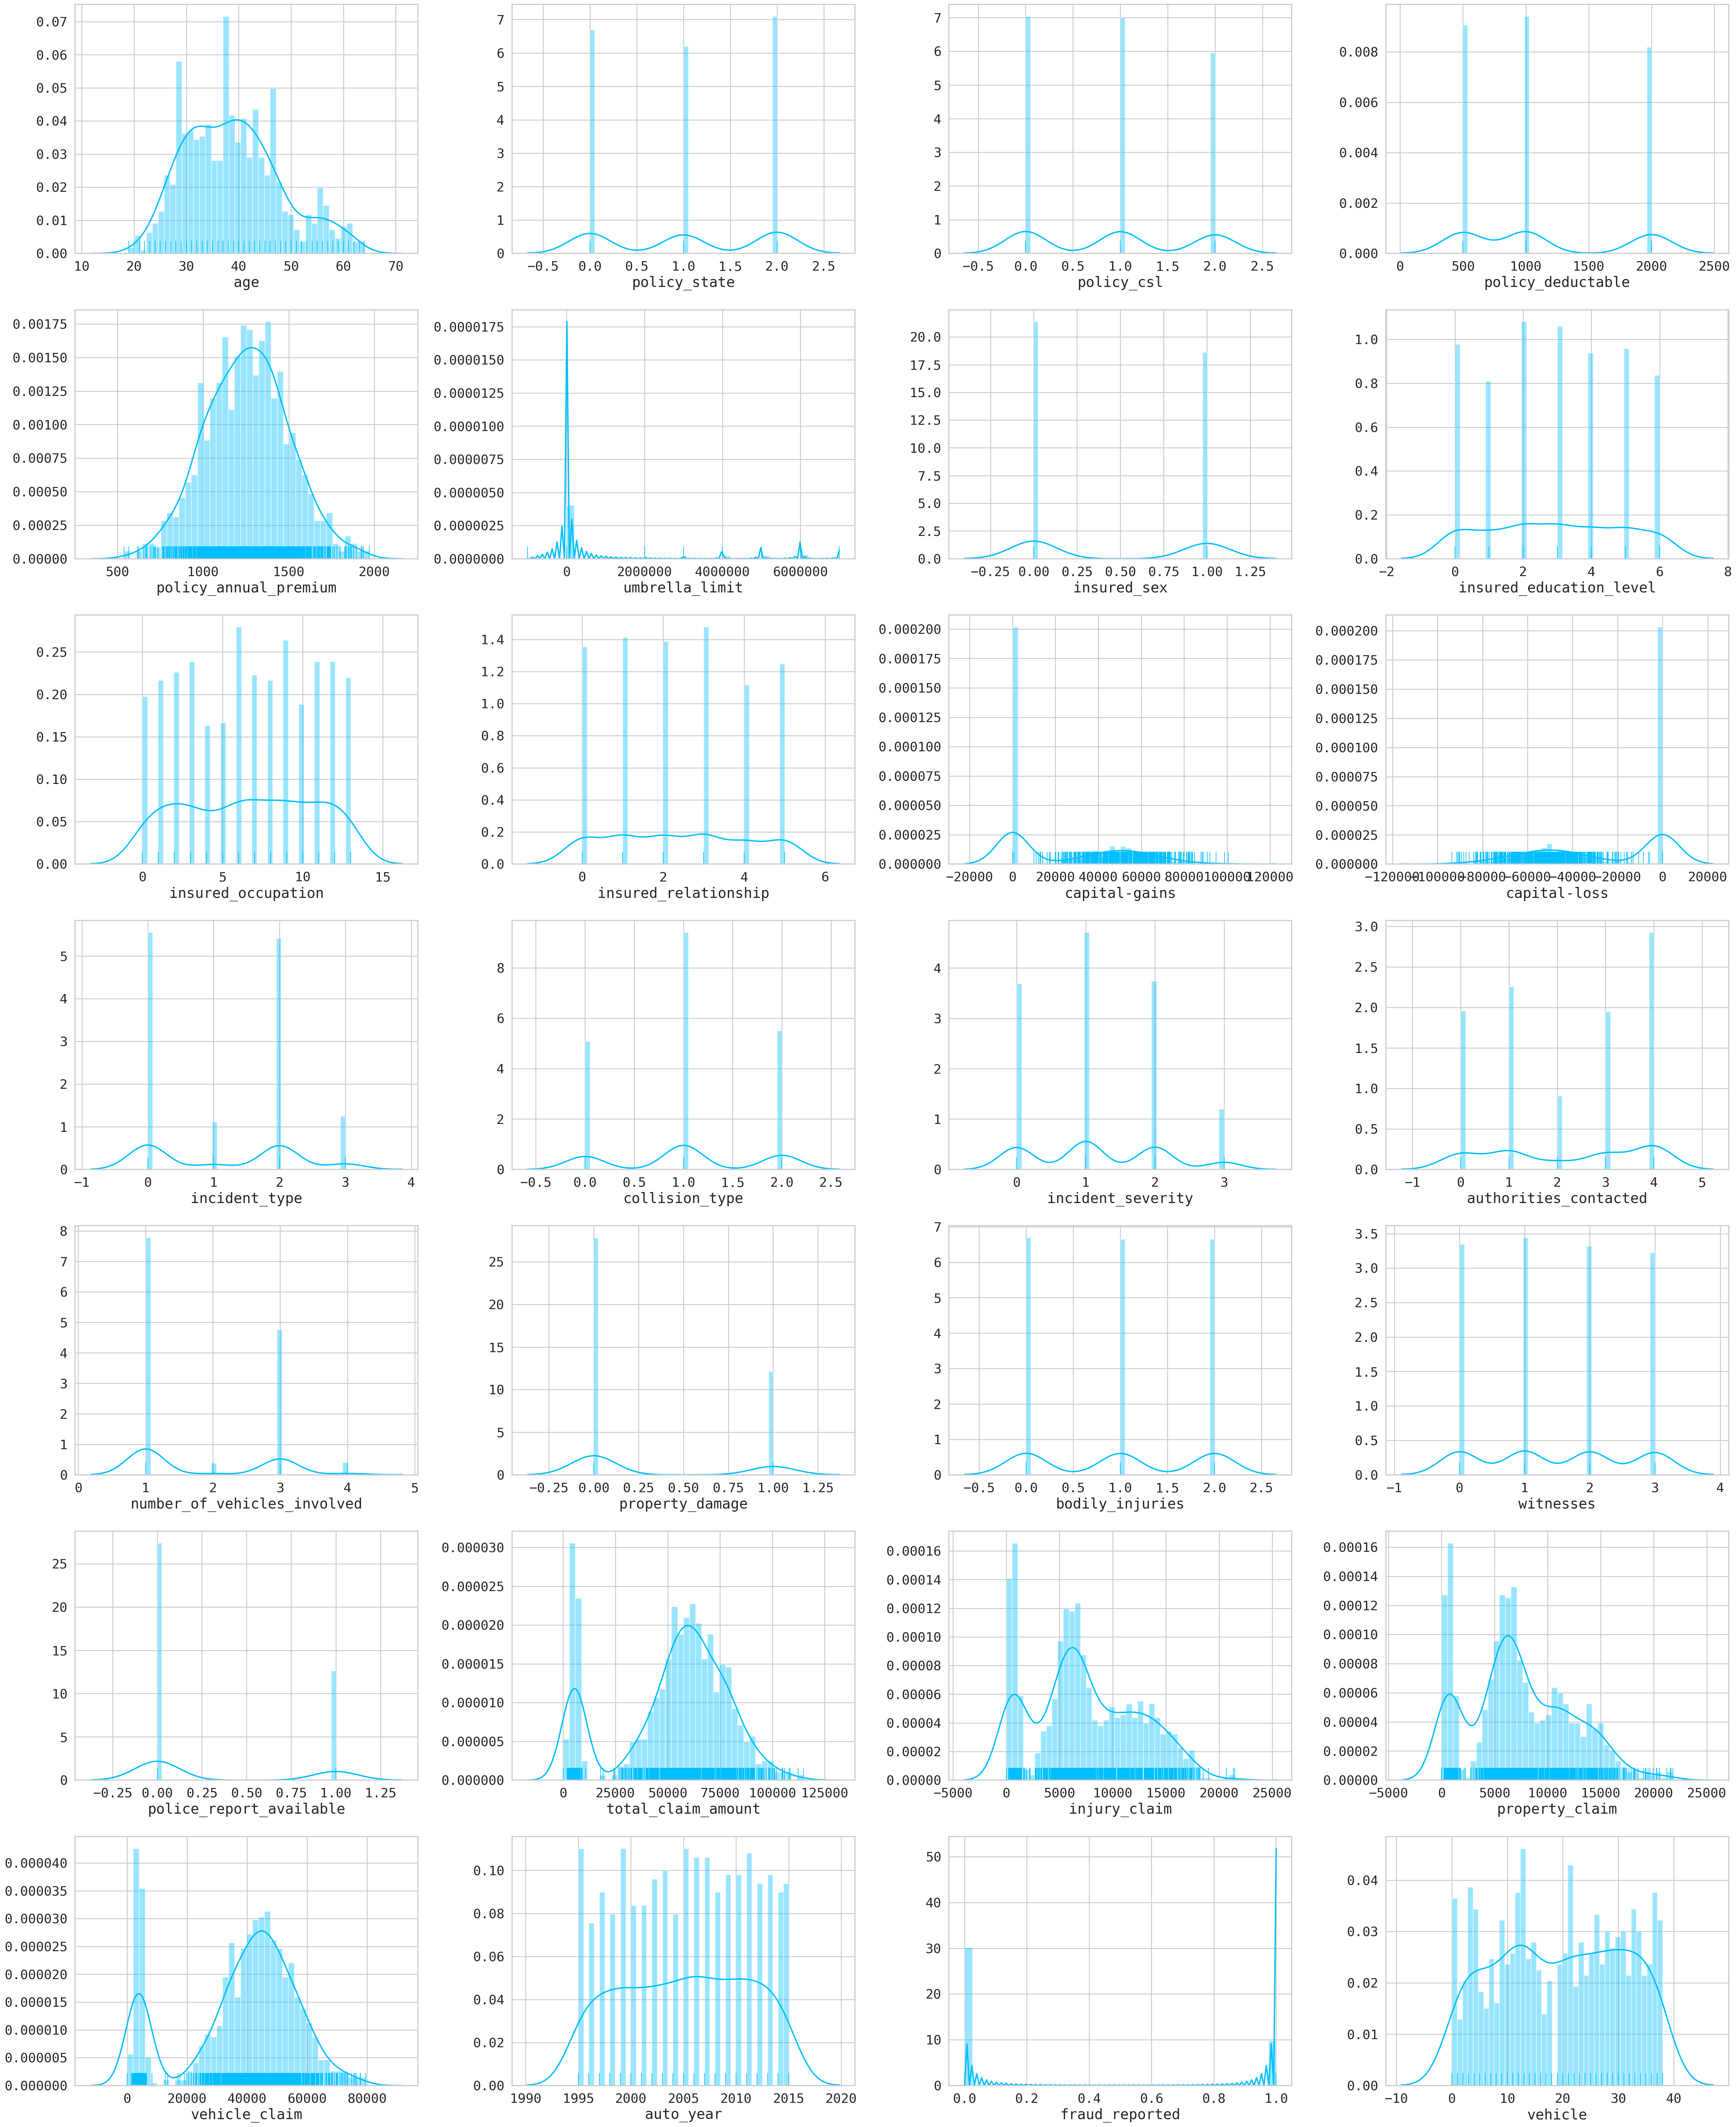

In [64]:
#checking spread of all attributes and skewness
plt.figure(figsize=(40,55),dpi=140)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,28):
    plt.subplot(8,4,i+1)
    sns.distplot(frd[cl[i]],color='deepskyblue',kde=True,rug=True,bins=40)
    plt.tight_layout()

In [65]:
frd.skew()

age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936


In [66]:
#removing skew
#a skewness value above +0.55 is termed as positive skew a.k.a right skew/left_tailed skew 
# a skewness value below -0.55 is termed as negative skew a.k.a left skew/right_tailed skew
#here we have only right skew so removing them
for i in frd.columns:
    if frd.skew().loc[i]>0.55:
        frd[i]=np.log1p(frd[i])
    elif frd.skew().loc[i]< -0.55:
         frd[i]=np.square(frd[i])
print(frd.skew())

age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.584272
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount             0.536626
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                  0.482744


In [67]:
frd_corr=frd.corr()
frd_corr

age  policy_state  policy_csl  \
age                          1.000000     -0.020012   -0.013323   
policy_state                -0.020012      1.000000    0.001653   
policy_csl                  -0.013323      0.001653    1.000000   
policy_deductable            0.032036      0.017612    0.009912   
policy_annual_premium        0.005330      0.015089    0.032654   
umbrella_limit              -0.003501     -0.005472    0.009524   
insured_sex                  0.073790     -0.018002   -0.003405   
insured_education_level      0.001647     -0.027173    0.008337   
insured_occupation           0.014798     -0.025357    0.016461   
insured_relationship         0.076129     -0.017060   -0.034603   
capital-gains               -0.004529      0.068619    0.009786   
capital-loss                 0.012860     -0.031926   -0.035589   
incident_type               -0.026286      0.032373    0.005180   
collision_type              -0.076325      0.049961    0.028139   
incident_severity           -0.064396     -0.028353    0.017195   
authorities_contacted        0.018441     -0.014647    0.051030   
number_of_vehicles_involved  0.020391     -0.045514   -0.014658   
property_damage             -0.008239     -0.013576   -0.024497   
bodily_injuries             -0.012254      0.012097    0.001385   
witnesses                    0.056360      0.025838    0.071361   
police_report_available     -0.018135      0.065316   -0.008979   
total_claim_amount           0.073184     -0.017674   -0.045122   
injury_claim                 0.077149     -0.048188   -0.080098   
property_claim               0.062375     -0.006420   -0.042876   
vehicle_claim                0.058555     -0.005329   -0.032533   
auto_year                    0.005594     -0.001160   -0.030370   
fraud_reported               0.013279      0.034587   -0.032509   
vehicle                      0.036516      0.008028   -0.009782   

                             policy_deductable  policy_annual_premium  \
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_csl                            0.009912               0.032654   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.000404              -0.006430   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_relationship                 -0.019000               0.004417   
capital-gains                         0.031673              -0.006807   
capital-loss                         -0.019601               0.033133   
incident_type                        -0.032291               0.051606   
collision_type                       -0.055984               0.032604   
incident_severity                    -0.016363              -0.013911   
authorities_contacted                 0.002769              -0.054425   
number_of_vehicles_involved           0.046331              -0.044544   
property_damage                       0.013074               0.076447   
bodily_injuries                      -0.037263               0.027837   
witnesses                             0.071709               0.003433   
police_report_available               0.036275               0.032413   
total_claim_amount                    0.027892              -0.010994   
injury_claim                          0.038459              -0.024119   
property_claim                        0.071031              -0.014073   
vehicle_claim                        -0.001319               0.003719   
auto_year                             0.030569              -0.042446   
fraud_reported                        0.015774              -0.012686   
vehicle                              -0.030911

In [68]:
#IMPORTING IMPORTANT LIBRARIES FOR MODEL GENERATION
from sklearn.preprocessing import StandardScaler #FOR STANDARD SCALING OF INPUTS
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score as cvs ,RandomizedSearchCV as rsv
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve,roc_auc_score,auc

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [69]:
frd.head(3)

age  policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0   48             2           1               1000                1406.91   
1   42             1           1               2000                1197.22   
2   29             2           0               2000                1413.14   

   umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
0        0.000000            1                        4                   2   
1       15.424949            1                        4                   6   
2       15.424949            0                        6                  11   

   insured_relationship  ...  bodily_injuries  witnesses  \
0                     0  ...                1          2   
1                     2  ...                0          0   
2                     3  ...                2          3   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                 0.693147          5127992100          6510           13020   
1                 0.000000            25704900           780             780   
2                 0.000000          1200622500          7700            3850   

   vehicle_claim  auto_year  fraud_reported  vehicle  
0     2712326400       2004        0.693147       28  
1       12320100       2007        0.693147       23  
2      533610000       2007        0.000000       13  

[3 rows x 28 columns]

In [70]:
#spliting dataset in to x and y for training and testing
x=frd.drop(['fraud_reported'],axis=1)
y=frd['fraud_reported']
print('x:',"--"*30,"\n", x.head(7),'\nshape of x:', x.shape)
print('\ny:',"--"*30,"\n", y.head(7),'\nshape of y:', y.shape)

x: ------------------------------------------------------------ 
    age  policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0   48             2           1               1000                1406.91   
1   42             1           1               2000                1197.22   
2   29             2           0               2000                1413.14   
3   41             0           1               2000                1415.74   
4   44             0           2               1000                1583.91   
5   39             2           1               1000                1351.10   
6   34             1           1               1000                1333.35   

   umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
0        0.000000            1                        4                   2   
1       15.424949            1                        4                   6   
2       15.424949            0                        6                 

In [71]:
x.isnull().sum()

age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 1
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
vehicle                        0
dtype: int64

In [75]:
#after skewness remval umbrella limit got a null value so removing it with the mean of umbrella_limit
x['umbrella_limit'].replace(np.NaN,x['umbrella_limit'].mean(),inplace=True)

In [76]:
x['umbrella_limit'].isnull().sum()

0

null value has been removed

In [77]:
y=round(y).astype('int64')
y.head(10)

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    0
8    0
9    0
Name: fraud_reported, dtype: int64

In [78]:
#Using StandardScaler Feature to standardise the values of x
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[ 0.98335151  1.17982066  0.06723144 ...  0.72855389 -0.18859446
   0.75391015]
 [ 0.32971067 -0.0245796   0.06723144 ... -1.40363534  0.31047639
   0.31339504]
 [-1.08651116  1.17982066 -1.17591597 ... -0.99197381  0.31047639
  -0.56763519]
 ...
 [-0.54181045  1.17982066  0.06723144 ...  0.76324027 -1.51945005
   1.10632224]
 [ 2.50851348 -1.22897986  1.31037885 ... -0.35898232 -1.18673615
  -1.36056239]
 [ 2.2906332   1.17982066  0.06723144 ... -1.40267009  0.31047639
   0.31339504]]


In [79]:
#converting y into  np.array format form pandas.core.series.Series form and reshaping it in the form of 1 columns and many rows
y=np.array(y)
y=y.reshape(-1,1)
print(y.shape)

(980, 1)


In [80]:
print('shape of x=', x.shape,'\nshape of y=', y.shape)

shape of x= (980, 27) 
shape of y= (980, 1)


creating a function to achive the highest perfoming random st,accuracy score,tpr,fpr,auc score for all model to be used

In [81]:
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        auc_scores=roc_auc_score(y_test,pred)
        tpr,fpr,threshold=roc_curve(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\n\nThe best suited random_score is: ', final_rst, '\n\nAccuracy score:', max_ac_score)
    print('\nF1 SCORE:', f1)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nAUC_ROC Score:\n',auc_scores)
    print('\nTPR:',tpr,'\nFPR:',fpr)

LOGISTIC REGRESSION

In [82]:
logi=LogisticRegression()
acusr(logi,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

The best suited random_score is:  61 

Accuracy score: 0.8104956268221575

F1 SCORE: 0.4525547445255475

CONFUSION MATRIX:
 [[237  30]
 [ 45  31]]

AUC_ROC Score:
 0.6477675931401538

TPR: [0.         0.11235955 1.        ] 
FPR: [0.         0.40789474 1.        ]


In [83]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,x,y,scoring='accuracy',cv=50)
logi_roc_auc=cvs(logi,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
print('THE AUC_ROC SCORE AT LOGISTIC MODEL IS=', logi_roc_auc.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.7764444444444443
THE AUC_ROC SCORE AT LOGISTIC MODEL IS= 0.7611857142857141


DECISION TREE CLASSIFIER

In [84]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10),'min_samples_split':range(2,8)}
dtc_rs=rsv(dtc,dtc_para,cv=70)
dtc_rs.fit(x,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [85]:
dtc=DecisionTreeClassifier(splitter='random',min_samples_split=6,max_depth=5,criterion='entropy')
acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random') 

The best suited random_score is:  37 

Accuracy score: 0.8425655976676385

F1 SCORE: 0.4713375796178344

CONFUSION MATRIX:
 [[223  44]
 [ 39  37]]

AUC_ROC Score:
 0.6610240488862607

TPR: [0.         0.16479401 1.        ] 
FPR: [0.         0.48684211 1.        ]


In [86]:
#using cross_val_score to check for over/under fitting of DTC model
dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=50)
dtc_roc_auc=cvs(dtc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())
print('THE AUC_ROC SCORE AT DTC MODEL IS=',  dtc_roc_auc.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.7975555555555556
THE AUC_ROC SCORE AT DTC MODEL IS= 0.7562309523809523


SUPPORT VECTOR CLASSIFIER

In [87]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_rsv=rsv(svc,svc_para,cv=70)
svc_rsv.fit(x,y)
print(svc_rsv)
print('\nbest score=', svc_rsv.best_score_)
print("\nbest parameters for SVC=\n",svc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.8091836734693878

best parameters for SVC=
 {'kernel': 'linear', 'gamma': 0.01}


In [88]:
svc=SVC(kernel='linear',gamma=0.01,degree=5)
acusr(svc,x,y)

In this SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

The best suited random_score is:  61 

Accuracy score: 0.8367346938775511

F1 SCORE: 0.6060606060606061

CONFUSION MATRIX:
 [[228  39]
 [ 26  50]]

AUC_ROC Score:
 0.755913660555884

TPR: [0.         0.14606742 1.        ] 
FPR: [0.         0.65789474 1.        ]


In [89]:
#using cross_val_score to check for over/under fitting of SVC model
svc_accuracy=cvs(svc,x,y,scoring='accuracy',cv=50)
svc_roc_auc=cvs(svc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT SVC MODEL IS=', svc_accuracy.mean())
print('THE AUC_ROC SCORE AT SVC MODEL IS=',  svc_roc_auc.mean())

THE ACCURACY SCORE AT SVC MODEL IS= 0.8099999999999998
THE AUC_ROC SCORE AT SVC MODEL IS= 0.7703428571428571


K NEIGHBORS CLASSIFIER

In [90]:
#using KNeighborsClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute']}
knc_rsv=rsv(knc,knc_para,cv=30)
knc_rsv.fit(x,y)
print(knc_rsv)
print('\nbest score=',knc_rsv.best_score_)
print('\nbest parameters for KNC=\n',knc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.7551020408163265

best parameters for KNC=
 {'n_neighbors': 56, 'algorithm': 'brute'}


In [91]:
knc=KNeighborsClassifier(n_neighbors=56,algorithm='brute')
acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=56, p=2,
                     weights='uniform') 

The best suited random_score is:  63 

Accuracy score: 0.8017492711370262

F1 SCORE: 0.0

CONFUSION MATRIX:
 [[267   0]
 [ 76   0]]

AUC_ROC Score:
 0.5

TPR: [0. 1.] 
FPR: [0. 1.]


In [92]:
#using cross_val_score to check for over/under fitting of KNC model
knc_accuracy=cvs(knc,x,y,scoring='accuracy',cv=50)
knc_roc_auc=cvs(knc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT KNC MODEL IS=', knc_accuracy.mean())
print('THE AUC_ROC SCORE AT KNC MODEL IS=',  knc_roc_auc.mean())

THE ACCURACY SCORE AT KNC MODEL IS= 0.7555555555555555
THE AUC_ROC SCORE AT KNC MODEL IS= 0.7085190476190476


GAUSSIAN NB

In [93]:
gnb=GaussianNB()
acusr(gnb,x,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 

The best suited random_score is:  134 

Accuracy score: 0.8046647230320699

F1 SCORE: 0.45398773006134974

CONFUSION MATRIX:
 [[217  50]
 [ 39  37]]

AUC_ROC Score:
 0.6497880938300808

TPR: [0.         0.18726592 1.        ] 
FPR: [0.         0.48684211 1.        ]


In [94]:
gnb_accuracy=cvs(gnb,x,y,scoring='accuracy',cv=50)
gnb_roc_auc=cvs(gnb,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GNB MODEL IS=', gnb_accuracy.mean())
print('THE AUC_ROC SCORE AT GNB MODEL IS=',  gnb_roc_auc.mean())

THE ACCURACY SCORE AT GNB MODEL IS= 0.7435555555555555
THE AUC_ROC SCORE AT GNB MODEL IS= 0.7351238095238095


RANDOM FOREST CLASSIFIER

In [95]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,300,350],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=70)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [96]:
rfc=RandomForestClassifier(n_estimators=350,max_depth=9,criterion='entropy')
acusr(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

The best suited random_score is:  63 

Accuracy score: 0.8250728862973761

F1 SCORE: 0.3875968992248062

CONFUSION MATRIX:
 [[239  28]
 [ 51  25]]

AUC_ROC Score:
 0.6120392272816874

TPR: [0.         0.10486891 1.        ] 
FPR: [0.         0.32894737 1.        ]


In [97]:
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=50)
rfc_roc_auc=cvs(rfc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
print('THE AUC_ROC SCORE AT RFC MODEL IS=',  rfc_roc_auc.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 0.7724444444444444
THE AUC_ROC SCORE AT RFC MODEL IS= 0.7637380952380951


GRADIENT BOOSTING CLASSIFIER

In [98]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
para= {"learning_rate": [0.001,0.025],"n_estimators":[450,600],'criterion':('friedman_mse','mse','mae')}
gbc_rs= rsv(gbc,para,cv=70)
gbc_rs.fit(x_train,y_train)
print(gbc_rs)
print("\nbest parameters:",gbc_rs.best_params_)
print("\n best score:",gbc_rs.best_score_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [99]:
gbc=GradientBoostingClassifier(learning_rate=0.025,max_depth=4,n_estimators=450,criterion='mae')
acusr(gbc,x,y)

In this GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.025,
                           loss='deviance', max_depth=4, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=450, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False) 

The best suited random_score is:  165 

Accuracy score: 0.8454810495626822

F1 SCORE: 0.48447204968944096

CONFUSION MATRIX:
 [[221  46]
 [ 37  39]]

AUC_ROC Score:
 0.6704366252710428

TPR: [0.         0.17228464 1.        ] 
FPR: [0.         0.51315789 1.        ]


In [100]:
gbc_accuracy=cvs(gbc,x,y,scoring='accuracy',cv=50)
gbc_roc_auc=cvs(gbc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GBC MODEL IS=', gbc_accuracy.mean())
print('THE AUC_ROC SCORE AT GBC MODEL IS=',  gbc_roc_auc.mean())

THE ACCURACY SCORE AT GBC MODEL IS= 0.7858888888888889
THE AUC_ROC SCORE AT GBC MODEL IS= 0.7170380952380953


WE GOT ALL THE RANDOM STATE,ACCURACY_SCORE,AUC_ROC SCORE OF ALL ALGORITHMS WITH AND WITHOUT CROSSVALIDATION
NOW PUTTING THEM ALL IN ONE DATAFRAME FOR TABULAR FORM PROPER VISUALIZATION

In [101]:

results=[['LOGI_REG',61,0.8104956,0.647767,[0.0,0.11235955,1.0],[0.0,0.40789474,1.0],0.7764444,0.761185],
         ['DTC',37,0.8425655,0.6610240,[0.0,0.16479401,1.0],[0.0,0.48684211,1.0],0.797555,0.7562309],
         ['SVC',61,0.8367346,0.755913,[0.0,0.14606742,1.0],[0.0,0.65789474,1.0],0.8099999,0.7703428], 
         ['KNC',63,0.8017492,0.5,[0.0,1.0],[0.0,1.0],0.7555555,0.70851904],
         ['GNB',134,0.804664,0.64978809,[0.0,0.18726592,1.0],[0.0,0.48684211,1.0],0.7435555,0.7351238],
         ['RFC',63,0.8250728,0.61203922,[0.0,0.10486891,1.0],[0.0,0.32894737,1.0],0.7724444,0.76373809],
         ['GBC',165,0.845481,0.6704366,[0.0,0.17228464,1.0],[0.0,0.51315789,1.0],0.7858888,0.71703809]]

accomplished=pd.DataFrame(results,columns=['MODEL','RST','ACCU W\O CV','AUC SCORE W/O CV','TPR','FPR','ACCURACY W CV','AUC SCORE W CV'])

accomplished.style.set_properties(**{'background-color':'maroon','color': 'yellow','border-color': 'orange'})

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
svc=SVC(kernel='linear',gamma=0.01,degree=5,C=5)
para={'n_estimators':(70,80,95),'learning_rate':(0.1,0.0023,0.25)}
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
abc_rs=rsv(abc,para,cv=30)
abc_rs.fit(x_train,y_train)
print(abc_rs)
print("best parameters:", abc_rs.best_params_)
print("\n best score:",abc_rs.best_score_)


RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                base_estimator=SVC(C=5,
                                                                   cache_size=200,
                                                                   class_weight=None,
                                                                   coef0=0.0,
                                                                   decision_function_shape='ovr',
                                                                   degree=5,
                                                                   gamma=0.01,
                                                                   kernel='linear',
                                                                   max_iter=-1,
                                                                   probability=False,
                                                   

In [103]:
#creating the model using the abc parameters obtained from RandomizedSearchCV
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME',n_estimators=70,learning_rate=0.25)
acusr(abc,x,y)

In this AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=5, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=5, gamma=0.01, kernel='linear',
                                      max_iter=-1, probability=False,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.25, n_estimators=70, random_state=None) 

The best suited random_score is:  74 

Accuracy score: 0.8192419825072886

F1 SCORE: 0.4172661870503597

CONFUSION MATRIX:
 [[233  34]
 [ 47  29]]

AUC_ROC Score:
 0.6271190616991918

TPR: [0.         0.12734082 1.        ] 
FPR: [0.         0.38157895 1.        ]


After boosting the model is giving slightly a higher value so saving it and visualizing the AUC curve

In [108]:
#PLOTTING THE AUC CURVE USING THE PARAMETERS OBTAINED
tpr=[0.0,0.12734082,1.0] 
fpr=[0.0,0.38157895,1.0]
AUC=0.6271190

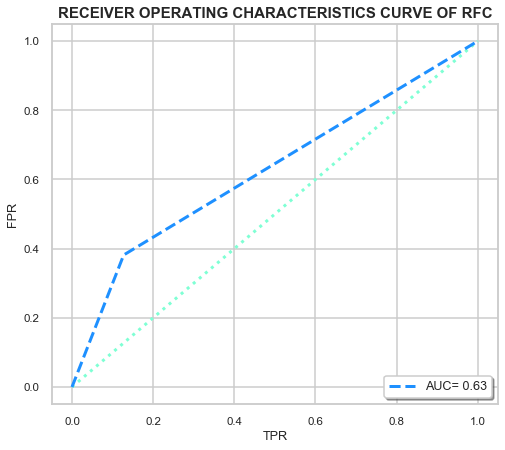

In [109]:
#plotting the auc_roc curve
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
plt.figure(figsize=(8,7))
plt.plot([0,1],[0,1],color='aquamarine',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % AUC,color='dodgerblue',lw=3,linestyle='--')
plt.legend(loc='lower right',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE OF RFC',size=15,weight='bold',loc='center')
plt.show()

#saving the model

In [110]:
joblib.dump(abc,'INSURANCE_FRAUD_ABC.pkl')

['INSURANCE_FRAUD_ABC.pkl']